<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/notebooks/Lecture_01_Pandas_Matplotlib_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on Python for Data Science


### Master II Livello - Data Science and Statistical Learning (MD2SL) 2020-2021

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2020/2021<br/>
June, 12 2021

# Lecture 1: Introduction to <code>pandas</code> and Matplotlib and sklearn

## What is <code>pandas</code>?

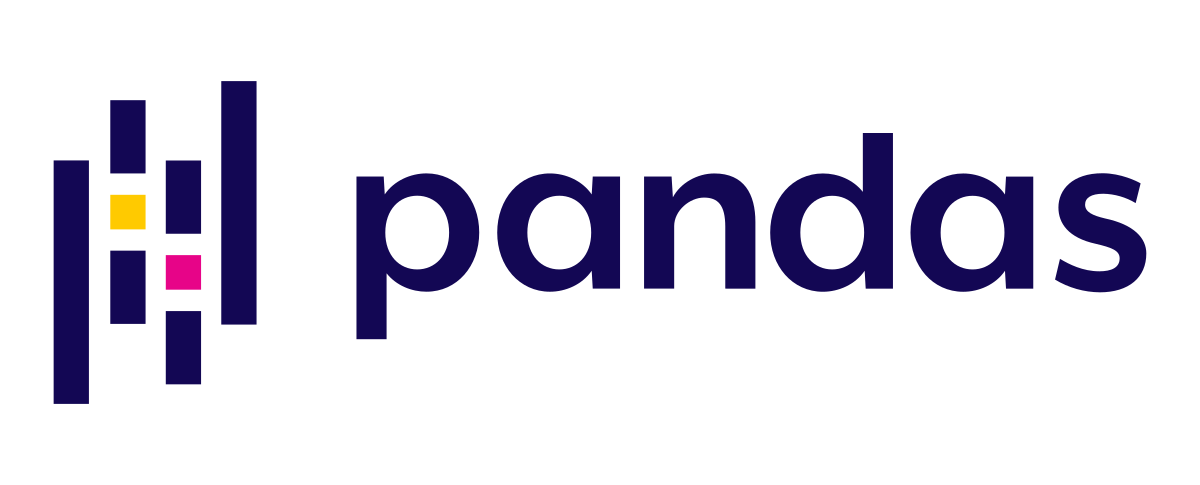

## What *is* <code>pandas</code>?

-  Very likely, one of the most important tool for a (Pythonista) Data Scientist!

-  It contains data structures and data manipulation tools designed to make data **cleaning** and **analysis** fast and easy in Python.

-  Acronym derived from "**p**ython **an**d **d**ata **a**nalysi**s**" or, maybe, "**pan**el **da**ta".

## What Does It Provide Us With?

-  Often used in tandem with numerical computing tools like <code>**numpy**</code> and <code>**scipy**</code>, as well as machine learning modules like <code>**scikit-learn**</code> and <code>**statsmodels**</code>, and data visualization libraries like <code>**matplotlib**</code> and <code>seaborn</code>. 

-  It uses significant parts of <code>**numpy**</code> style of array-based computing, especially vectorized functions for data processing without <code>**for**</code> loops.

-  You can find more about <code>**pandas**</code> on the official [website](http://pandas.pydata.org/).

In [1]:
"""
We import numpy as we will need it very often in combination with pandas
"""
import numpy as np
"""
As any other third-party module, the pandas module has to be imported before it can be used.
If you installed Python with Anaconda, pandas would be just available to you.
This is usually how pandas is imported and aliased. Although you could also
use another syntax like 'from pandas import *', I strongly encourage you to define an alias,
as this will help you to identify pandas' functions in your code.
"""
import pandas as pd

## Introduction to <code>pandas</code> Data Structures

-  Two workhorse data structures: <code>**Series**</code> and <code>**DataFrame**</code>. 

-  While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

## <code>Series</code>

-  A <code>**Series**</code> is a one-dimensional array-like object containing a **sequence of values** (similar to <code>**numpy**</code>'s arrays) and an associated array of data labels, called its <code>**index**</code>.

-  The string representation of a <code>**Series**</code> displayed interactively shows the index on the left and the values on the right. 

-  If no index is specified for the data, a default one consisting of the integers $0$ through $n-1$ (where $n$ is the length of the data) is created.

In [2]:
# Create a Series object (from a bulit-in Python list)
s = pd.Series([4, 7, -5, 3])
# Print the string representation of the Series object above
print(s)
print()
# We can get the array representation and index object of the Series 
# via its values and index attributes, respectively
# Print the array of values
print("The values of the Series object are: {}".format(s.values))
# Print the array of indices
print("The index of the Series object is: {}".format(s.index)) # like range(4)

0    4
1    7
2   -5
3    3
dtype: int64

The values of the Series object are: [ 4  7 -5  3]
The index of the Series object is: RangeIndex(start=0, stop=4, step=1)


In [3]:
"""
Often it will be desirable to create a Series with an index 
identifying each data point with a label.
"""
s2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(s2)
print()
print("The index of the Series object is: {}".format(s2.index))

d    4
b    7
a   -5
c    3
dtype: int64

The index of the Series object is: Index(['d', 'b', 'a', 'c'], dtype='object')


In [4]:
"""
Compared with numpy arrays, you can use values in the index 
when selecting single values or a set of values.
"""
# Accessing the element using the index value (i.e., not just an integer as with numpy!)
print("The value indexed by 'a' is: {}".format(s2['a']))
# Assign a new value corresponding to an index
s2['c'] = 42
print("After the assignment, the new Series object is:\n{}".format(s2))
print()
# Indexing a subset of the elements using a subset of the index
print("The sub-series is:\n{}".format(s2[['c', 'b', 'd']]))

The value indexed by 'a' is: -5
After the assignment, the new Series object is:
d     4
b     7
a    -5
c    42
dtype: int64

The sub-series is:
c    42
b     7
d     4
dtype: int64


In [5]:
"""
Using numpy functions or numpy-like operations, such as filtering with a boolean array, 
scalar multiplication, or applying math functions, will preserve the index-value link.
"""
print("Select only the strictly positive elements of the series:\n{}".format(s2[s2 > 0]))
print()
double_s2 = s2 * 2
print("Double each element of the series:\n{}".format(double_s2))
print()
exp_s2 = np.exp(s2)
print("Apply the exponential function to each element of the series:\n{}".format(exp_s2))
# Note the implicit type conversion after the operation above

Select only the strictly positive elements of the series:
d     4
b     7
c    42
dtype: int64

Double each element of the series:
d     8
b    14
a   -10
c    84
dtype: int64

Apply the exponential function to each element of the series:
d    5.459815e+01
b    1.096633e+03
a    6.737947e-03
c    1.739275e+18
dtype: float64


In [6]:
"""
Another way to think about a pandas Series is as a fixed-length, ordered built-in dict, 
as it is a mapping of index values to data values. 
Therefore, Series can be used in many contexts where you might use a dict.
"""
# Suppose you have a dictionary containing the following key-value pairs
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
# You can create a Series object from the dictionary above
s3 = pd.Series(sdata)
print("The series object created from the dictionary is:\n{}".format(s3))

The series object created from the dictionary is:
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [7]:
"""
When only passing a dict, the index in the resulting Series will have the dict's keys
in sorted order. You can override this by passing the dict keys 
in the order you want them to appear in the resulting Series.
"""
states = ['California', 'Texas', 'Oregon', 'Ohio']
s4 = pd.Series(sdata, index=states)
print("The series object created from the dictionary and index is:\n{}".format(s4))

The series object created from the dictionary and index is:
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
dtype: float64


In [8]:
"""
Here, 3 values found in sdata were placed in the appropriate locations, 
but since no value for 'California' was found, it appears as NaN (Not a Number),
which is considered in pandas to mark missing or NA values. 
We will use the terms "missing" or "NA" to refer to missing data. 
The 'isnull' and 'notnull' functions in pandas should be used to detect missing data.
"""
# Test for NA
# We can either invoke the method on the Series object
print("Check which elements of the series are null:\n{}".format(s4.isnull()))
# Or use the standard pandas function and pass the Series as input argument
#print("Check which elements of the series are null:\n{}".format(pd.isnull(s4)))

Check which elements of the series are null:
California     True
Texas         False
Oregon        False
Ohio          False
dtype: bool


In [9]:
# Test for NOT NA
# We can either invoke the method on the Series object
print("Check which elements of the series are NOT null:\n{}".format(s4.notnull()))
# Or use the standard pandas function and pass the Series as input argument
#print("Check which elements of the series are NOT null:\n{}".format(pd.notnull(s4)))

Check which elements of the series are NOT null:
California    False
Texas          True
Oregon         True
Ohio           True
dtype: bool


In [10]:
"""
Series automatically aligns differently-indexed data in arithmetic operations.
"""
print("Series s3:\n{}".format(s3))
print()
print("Series s4:\n{}".format(s4))
print()
print("Series s3 + s4:\n{}".format(s3 + s4))

Series s3:
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Series s4:
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
dtype: float64

Series s3 + s4:
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [11]:
"""
Both the Series object itself and its index have a name attribute, 
which integrates with other key areas of pandas functionality.
"""
s4.name = 'population'
s4.index.name = 'state'
print(s4)

state
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
Name: population, dtype: float64


In [12]:
"""
A Series's index can be altered in place by assignment.
"""
s4.index = ['Alice', 'Bob', 'Carl', 'Denise']
print(s4)
# What happens if there is a length mismatch between the old and the new index?

Alice         NaN
Bob       71000.0
Carl      16000.0
Denise    35000.0
Name: population, dtype: float64


In [13]:
"""
A Series's index can be altered in place by assignment.
"""
s4.index = ['Alice', 'Bob', 'Carl', 'Denise', 'Eddie', 'Fran']
print(s4)

ValueError: ignored

## <code>DataFrame</code>

-  A <code>**DataFrame**</code> represents a rectangular table of data and contains an **ordered collection of columns**.

-  Each column can be a different value type (numeric, string, boolean, etc.).

-  The <code>**DataFrame**</code> has both a row and column index; it can be thought of as a dict of <code>**Series**</code> all sharing the same index. 

-  Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays (the exact details are outside the scope of this class).


<span style="color: red">**NOTE:**</span>
While a <code>**DataFrame**</code> is physically two-dimensional, you can use it to represent higher-dimensional data in a tabular format using **hierarchical indexing**, one of the more advanced data-handling features in <code>**pandas**</code>.

In [26]:
"""
There are many ways to construct a DataFrame, 
though one of the most common is from a dict of equal-length lists or numpy arrays.
"""
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]}

df = pd.DataFrame(data)
# The resulting DataFrame will have its index assigned automatically as with Series, 
# and the columns are placed in sorted order
print("The DataFrame created is as follows:\n{}".format(df))

The DataFrame created is as follows:
    state  year  population
0    Ohio  2000         1.5
1    Ohio  2001         1.7
2    Ohio  2002         3.6
3  Nevada  2001         2.4
4  Nevada  2002         2.9


In [27]:
"""
When you work with large DataFrames it is useful to show the first n rows
The 'head()' method without any input argument returns the first 5 rows.
Otherwise, you can call the method specifying the number of records to be displayed.
"""
print(df.head())
# You can also just type head()
df.head()

    state  year  population
0    Ohio  2000         1.5
1    Ohio  2001         1.7
2    Ohio  2002         3.6
3  Nevada  2001         2.4
4  Nevada  2002         2.9


,state,year,population
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
"""
If you specify a sequence of columns at creation time, 
the DataFrame's columns will be arranged in that order.
"""
# Note that column names must reflect key names of the input dictionary 'data'
df2 = pd.DataFrame(data, columns=['year', 'state', 'population'])
print(df2)

   year   state  population
0  2000    Ohio         1.5
1  2001    Ohio         1.7
2  2002    Ohio         3.6
3  2001  Nevada         2.4
4  2002  Nevada         2.9


In [29]:
"""
If you pass a column that isn't contained in the dict, 
it will appear with missing values (NaN) in the result.
"""
# Here we are adding an extra column 'debt' and we assign a string-based index,
# instead of the default integer range.
df3 = pd.DataFrame(data, columns=['year', 'state', 'population', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five'])
print(df3)

       year   state  population debt
one    2000    Ohio         1.5  NaN
two    2001    Ohio         1.7  NaN
three  2002    Ohio         3.6  NaN
four   2001  Nevada         2.4  NaN
five   2002  Nevada         2.9  NaN


In [30]:
"""
A column in a DataFrame can be retrieved as a Series,
either by dict-like notation or by attribute.
"""
# Accessing column using dict-like notation
print(df3['state'])
print()
# Accessing column using attribute ('.column_name') notation
print(df3.population)

# Note that the returned Series have the same index as the DataFrame, 
# and their name attribute has been appropriately set.

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: population, dtype: float64


In [31]:
"""
Rows can also be retrieved by position or name by a couple of methods, 
such as the 'loc' indexing field (much more on this later).
"""
# Accessing the row indexed by 'three'
df3.loc['three']

year          2002
state         Ohio
population     3.6
debt           NaN
Name: three, dtype: object

In [32]:
"""
Columns can be modified by assignment. 
For example, the empty 'debt' column could be assigned a scalar value or an array of values.
"""
# Assigning the same scalar value to the column 'debt'
df3['debt'] = 73.42
print(df3)

       year   state  population   debt
one    2000    Ohio         1.5  73.42
two    2001    Ohio         1.7  73.42
three  2002    Ohio         3.6  73.42
four   2001  Nevada         2.4  73.42
five   2002  Nevada         2.9  73.42


In [33]:
"""
Columns can be modified by assignment. 
For example, the empty 'debt' column could be assigned a scalar value or an array of values.
"""
# Assigning an array of values to the column 'debt'
df3['debt'] = np.array([1.3, 6.4, 0.5, 0.0, -9.8])
print(df3)
# When assigning lists or arrays to a column, 
# the value's length must match the length of the DataFrame.

       year   state  population  debt
one    2000    Ohio         1.5   1.3
two    2001    Ohio         1.7   6.4
three  2002    Ohio         3.6   0.5
four   2001  Nevada         2.4   0.0
five   2002  Nevada         2.9  -9.8


In [34]:
"""
We can also assign a Series to a DataFrame column.
In this case, its labels will be realigned exactly to the DataFrame's index, 
inserting missing values (NaN) in any holes.
"""
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
df3['debt'] = val
print(df3)
# If one or more elements in the specified index are not present
# in the DataFrame's index, the assignment for those elements won't occur

       year   state  population  debt
one    2000    Ohio         1.5   NaN
two    2001    Ohio         1.7  -1.2
three  2002    Ohio         3.6   NaN
four   2001  Nevada         2.4  -1.5
five   2002  Nevada         2.9  -1.7


In [35]:
"""
Assigning a column that doesn't exist will create a new column.
"""
# The effect of the following statement is to:
# 1. create a new column 'eastern'
# 2. assign to that column a value which results from the boolean expression
# Remember that boolean expressions computed over Series (or numpy arrays for that matters)
# return a Series (array)
df3['eastern'] = df3['state'] == 'Ohio'
print(df3)

       year   state  population  debt  eastern
one    2000    Ohio         1.5   NaN     True
two    2001    Ohio         1.7  -1.2     True
three  2002    Ohio         3.6   NaN     True
four   2001  Nevada         2.4  -1.5    False
five   2002  Nevada         2.9  -1.7    False


In [36]:
"""
To delete a column, we can use the 'del' keyword as with a dict.
"""
del df3['eastern']
print(df3)
print()
print("The columns of the DataFrame are: {}".format(df3.columns))

       year   state  population  debt
one    2000    Ohio         1.5   NaN
two    2001    Ohio         1.7  -1.2
three  2002    Ohio         3.6   NaN
four   2001  Nevada         2.4  -1.5
five   2002  Nevada         2.9  -1.7

The columns of the DataFrame are: Index(['year', 'state', 'population', 'debt'], dtype='object')


<span style="color: red">**Note:**</span>
The column returned when indexing a <code>**DataFrame**</code> is a **view** on the underlying data, <u>not</u> a copy. Thus, any in-place modifications to the <code>**Series**</code> will be reflected in the <code>**DataFrame**</code>. The column can be explicitly copied using the <code>**Series**</code>'s <code>**copy()**</code> method.

In [37]:
"""
Another possible way of creating a pandas DataFrame is by using
a dictionary of dictionaries (i.e., a nested dictionary).
With this approach, pandas will interpret the outer dictionary keys as the columns
and the inner keys as the row indices.
"""
population = {
    'Nevada': {2001: 2.4, 2002: 2.9},
    'California': {2000: 3.6, 2001: 3.7, 2002: 4.1},
    'Texas': {2000: 5.5, 2001: 5.8, 2002: 7.0},
}

df4 = pd.DataFrame(population)
print(df4)

      Nevada  California  Texas
2001     2.4         3.7    5.8
2002     2.9         4.1    7.0
2000     NaN         3.6    5.5


## Possible Arguments to <code>DataFrame()</code> Constructor

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_dataframe_1.png?raw=1" width="50%" align="center"/>

## Possible Arguments to <code>DataFrame()</code> Constructor

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_dataframe_2.png?raw=1" width="50%" align="center"/>

## <code>Index</code> Objects

-  <code>**Index**</code> objects are responsible for holding the axis **labels** and other metadata (like the axis name or names). 

-  Any array or other sequence of labels used when constructing a <code>**Series**</code> or <code>**DataFrame**</code> is internally converted to an <code>**Index**</code>.

-  They are **_immutable_**, as this makes safer to share those objects among data structures.

In [38]:
# Suppose we create a Series with an explicit index (i.e., a built-in list)
s = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
# Store the index property of the Series object
index = s.index
print("The index associated with the series is: {}".format(index))
# As any sequence-like objects, Index can be sliced over
print("The sliced index associated with the series is: {}".format(index[1:4]))

The index associated with the series is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The sliced index associated with the series is: Index(['b', 'c', 'd'], dtype='object')


In [42]:
# Index objects are IMMUTABLE
index[1] = 'b'  # TypeError

# You can assign the entire index but you can't modify one element of that

TypeError: ignored

## <code>Index</code> Object's Hierarchy

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_index.png?raw=1" width="50%" align="center"/>

## <code>Index</code> Object's Methods and Properties

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_index_methods.png?raw=1" width="50%" align="center"/>

In [43]:
"""
We can eliminate one or more entries from an axis using the 'drop' method.
This will return a new object with the entries that are left.
"""
s = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print("Original Series:\n{}".format(s))

Original Series:
a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


In [44]:
# Eliminate a single entry
new_s = s.drop('b')
print("Series after dropping entry 'b':\n{}".format(new_s))
print()
# Eliminate multiple entries
new_s = s.drop(['a', 'e'])
print("Series after dropping entries 'a' and 'e':\n{}".format(new_s))

Series after dropping entry 'b':
a    0.0
c    2.0
d    3.0
e    4.0
dtype: float64

Series after dropping entries 'a' and 'e':
b    1.0
c    2.0
d    3.0
dtype: float64


In [45]:
"""
With DataFrame, index values can be deleted from either axis: index (row) and column.
"""
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print("Original DataFrame:\n{}".format(df))

Original DataFrame:
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [46]:
# Eliminate entries on the default index axis (i.e., rows)
new_df = df.drop(['Utah', 'Ohio'])
print("Index-Dropped DataFrame (axis 0):\n{}".format(new_df))
print()
# Eliminate entries on the column axis
new_df2 = df.drop(['two', 'four'], axis=1)
print("Column-Dropped DataFrame (axis 1):\n{}".format(new_df2))

Index-Dropped DataFrame (axis 0):
          one  two  three  four
Colorado    4    5      6     7
New York   12   13     14    15

Column-Dropped DataFrame (axis 1):
          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


Many functions, like drop, which modify the size or shape of a Series or DataFrame, 
can manipulate an object in place **without returning a new object**.

``` python
inplace = True
```

In [47]:
"""
Many functions, like drop, which modify the size or shape of a Series or DataFrame, 
can manipulate an object in place without returning a new object.
"""
# Eliminating a single entry on the row axis in-place
df.drop('New York', inplace=True)
print(df)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11


## Indexing, Selecting, Slicing, and Filtering

-  <code>**Series**</code> indexing works analogously to <code>**numpy**</code> array indexing.

-  In addition to just integers, you can also use the <code>**Series**</code>'s index values.

In [48]:
# Create a Series object
s = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(s)
print()
# Accessing the 2nd element using integer indexing
print("The 2nd element of the Series is: {}".format(s[1]))
# Accessing the 3rd element using index value 'c'
print("The 3rd element of the Series is: {}".format(s['c']))

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

The 2nd element of the Series is: 1.0
The 3rd element of the Series is: 2.0


In [49]:
# Selecting multiple entries using a list of integers
print("The 1st and 3rd elements of the Series are:\n{}"
      .format(s[[0, 2]]))
print()
# Selecting multiple entries using a list of index values
print("The elements corresponding to entry 'a' and 'c' of the Series are:\n{}"
      .format(s[['a', 'c']]))

The 1st and 3rd elements of the Series are:
a    0.0
c    2.0
dtype: float64

The elements corresponding to entry 'a' and 'c' of the Series are:
a    0.0
c    2.0
dtype: float64


In [50]:
# Slicing the series using integer slicing
print("The first two elements of the Series are:\n{}".format(s[:2]))
print()
# Slicing using labels behaves differently than normal Python integer slicing 
# in that the endpoint is inclusive
print("The first two elements of the Series are:\n{}".format(s['a':'b']))
print()
# Filtering on a series according to a boolean condition
print("Select only those elements greater than 0 and less than or equal to 2:\n{}"
      .format(s[(s > 0) & (s <= 2)]))

The first two elements of the Series are:
a    0.0
b    1.0
dtype: float64

The first two elements of the Series are:
a    0.0
b    1.0
dtype: float64

Select only those elements greater than 0 and less than or equal to 2:
b    1.0
c    2.0
dtype: float64


In [51]:
"""
Indexing into a DataFrame is for retrieving one or more columns, 
either with a single value or sequence.
"""
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns=['one', 'two', 'three', 'four'])
print(df)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [52]:
# Accessing a single column in a DataFrame using column values (axis 1)
print("Column 'two':\n{}".format(df['two']))
print()
# Accessing multiple columns in a DataFrame using column values (axis 1)
print("Column 'three' and 'one':\n{}".format(df[['three', 'one']]))

Column 'two':
Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

Column 'three' and 'one':
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


In [53]:
"""
We can use integer slicing as well as boolean array to select rows.
"""
# Integer slicing inside of [] slices ONLY the rows
print("First two rows:\n{}".format(df[:2]))
print()
# Select all the rows corresponding to the entries where values in column 'three'
# are greater than 5 (this will filter out the first row)
print(df[df['three'] > 5])
print()
# Select all the rows corresponding to the entries where values in column 'two'
# are smaller than 7 (this will filter out the last two rows)
print(df[df['two'] < 7])

First two rows:
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7


In [54]:
"""
Boolean indexing on DataFrame works similar to Series.
"""
print(df < 3)

            one    two  three   four
Ohio       True   True   True  False
Colorado  False  False  False  False
Utah      False  False  False  False
New York  False  False  False  False


In [55]:
"""
Assignment over boolean indexing on a DataFrame
"""
df[df < 3] = 0
print(df)
# This makes DataFrame syntactically more like 
# a two-dimensional numpy array in this particular case.

          one  two  three  four
Ohio        0    0      0     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [56]:
"""
To indexing a DataFrame, there are two special operators: loc and iloc. 
They enable you to select a subset of the rows and columns from a DataFrame 
with numpy-like notation using either axis labels (loc) or integers (iloc).
"""
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah'
print(df.loc['Utah'])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (which corresponds to 'Utah')
print("3rd row:\n{}".format(df.iloc[2]))

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

3rd row:
one       8
two       9
three    10
four     11
Name: Utah, dtype: int64


In [57]:
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah' and the column corresponding to 'two'
print(df.loc['Utah', 'two'])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (which corresponds to 'Utah') and 2nd column ('two')
print("3rd row and 2nd column:\n{}".format(df.iloc[2,1]))

9

3rd row and 2nd column:
9


In [58]:
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah' and the columns 'two' and 'three'
print(df.loc['Utah', ['two', 'three']])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (Utah), 2nd and 3rd columns ('two', 'three')
print("3rd row; 2nd and 3rd columns:\n{}".format(df.iloc[2, [1,2]]))

two       9
three    10
Name: Utah, dtype: int64

3rd row; 2nd and 3rd columns:
two       9
three    10
Name: Utah, dtype: int64


In [59]:
print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
      .format(df.loc[['Ohio','New York'], ['four', 'one', 'two']]))
print()
print("1st and 4th row; 4th, 1st and 2nd column:\n{}".format(df.iloc[[0, 3], [3, 0, 1]]))

1st and 4th row; 4th, 1st and 2nd column:
          four  one  two
Ohio         3    0    0
New York    15   12   13

1st and 4th row; 4th, 1st and 2nd column:
          four  one  two
Ohio         3    0    0
New York    15   12   13


### Mixed label/integer selection (DEPRECATED!)
 ```python
 print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
      .format(df.ix[['Ohio', 'New York'], [3, 0, 1]]))

AttributeError                            Traceback (most recent call last)
<ipython-input-60-502b2e794afe> in <module>()
      1 # Mixed label/integer selection (DEPRECATED!)
      2 print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
----> 3       .format(df.ix[['Ohio', 'New York'], [3, 0, 1]]))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py in __getattr__(self, name)
   5139             if self._info_axis._can_hold_identifiers_and_holds_name(name):
   5140                 return self[name]
-> 5141             return object.__getattribute__(self, name)
   5142 
   5143     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'ix'


In [61]:
"""
Slicing over two axis of a DataFrame.
"""
# Using loc in combination with label slicing (rightmost extreme included!)
print(df.loc[:'Utah', 'two':'three'])

          two  three
Ohio        0      0
Colorado    5      6
Utah        9     10


In [62]:
"""
Slicing over two axis of a DataFrame.
"""
# Using iloc in combination with integer slicing (rightmost extreme NOT included!)
print(df.iloc[1:, :3])

          one  two  three
Colorado    4    5      6
Utah        8    9     10
New York   12   13     14


In [63]:
"""
Indexing and Slicing can be mixed (e.g., indexing on one axis and slicing on the other).
This can be done both using loc and iloc operator
"""
# Indexing over axis 0 and slicing over axis 1 using loc.
# row indexed by 'New York', column indexed by 'one', 'two' and 'three'
print(df.loc['New York', 'one':'three'])
print()
# Slicing over axis 0 and indexing over axis 1 using iloc.
# first two rows, 3rd column
print(df.iloc[:2, 2])

one      12
two      13
three    14
Name: New York, dtype: int64

Ohio        0
Colorado    6
Name: three, dtype: int64


## Indexing Options for <code>DataFrame</code>

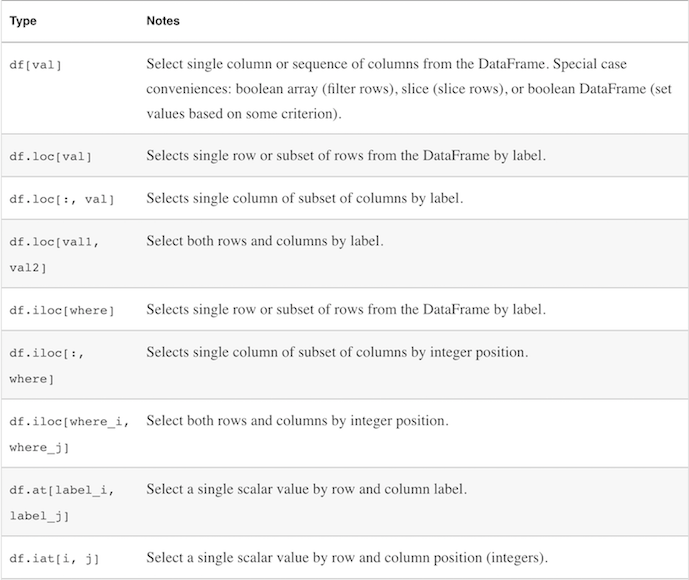

## Arithmetic and Data Alignment

-  An important <code>**pandas**</code> feature is the behavior of arithmetic between objects with different indexes.

-  When adding together objects, if any index pairs are not the same, the respective index in the result will be the **union** of the index pairs. 

-  For users with database experience, this is similar to an automatic **outer join** on the index labels.

-  The internal data alignment introduces <code>**NaN**</code> values in the label locations that don't overlap.

In [64]:
"""
Consider the following two Series objects.
"""
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
# Let's try to add s1 to s2 as follows.
print(s1 + s2)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [65]:
"""
In the case of DataFrame, alignment is performed on both the rows and the columns.
"""
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
print(df1)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0


In [66]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df2)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [67]:
"""
Adding these together returns a DataFrame whose index and columns
are the union of the ones in each DataFrame.
"""
print(df1 + df2)

            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN


In [68]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
print(df1)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0


In [69]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
print(df2)

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [70]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
# df1 + df2 will result in NaN on those unmatched indices
print(df1 + df2)

      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN


In [71]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
# Using the add method on df1, we pass df2 and an argument to fill_value
print(df1.add(df2, fill_value=0))

      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0  11.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0


## Arithmetic Operations

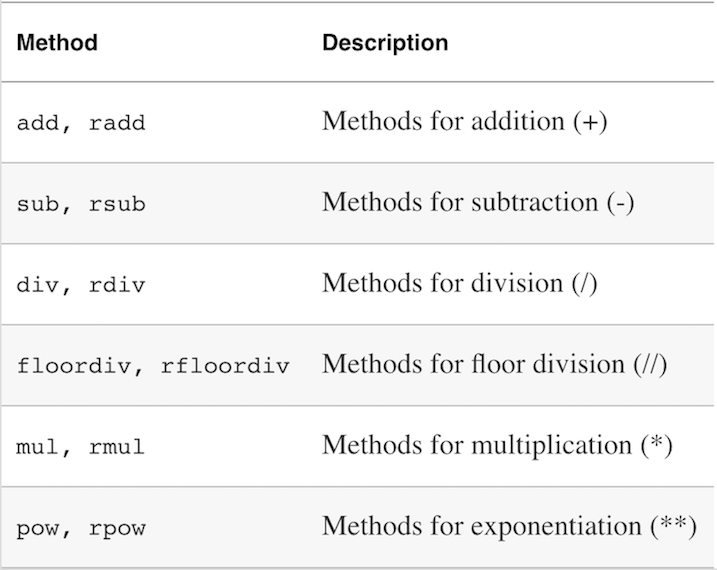

## Operations between <code>DataFrame</code> and <code>Series</code>

-  As with <code>**numpy**</code> arrays of different dimensions, arithmetic between <code>**DataFrame**</code> and <code>**Series**</code> is also defined.

-  Let's first recall again how this works with <code>**numpy**</code>.

In [72]:
# Let's define a two-dimensional numpy array (i.e., a 3-by-4 matrix)
X = np.arange(12).reshape(3,4)
print("X =\n{}".format(X))
# Let's define a one-dimensional numpy array (i.e., a 3-by-1 vector)
y = np.arange(3).reshape(3,1)
print("y =\n{}".format(y))
print()
print("X - y =\n{}".format(X-y))

X =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
y =
[[0]
 [1]
 [2]]

X - y =
[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [73]:
"""
Let's see the same yet applied to a pandas DataFrame and a Series.
"""
df = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

print("DataFrame:\n{}".format(df))
print()
s = df.iloc[0]
print("Series:\n{}".format(s))

DataFrame:
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

Series:
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


In [74]:
"""
By default, arithmetic between DataFrame and Series matches the index of the Series 
on the DataFrame's columns, broadcasting down the rows.
"""
print(df - s)

          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0


In [75]:
"""
If an index value is not found in either the DataFrame's columns or the Series's index, 
the objects will be reindexed to form the union.
"""
s2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(df + s2)

          b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN


In [76]:
"""
If we want to instead broadcast over the columns, matching on the rows, 
you have to use one of the arithmetic methods. For example:
"""
# Get a Series corresponding to the 'd' column
s3 = df['d']
print(s3)
# Subtract from the DataFrame the Series just extracted using axis
# The axis number is the axis to match on. 
# In this case we mean to match on the DataFrame's row index (axis=0) and broadcast across.
diff_df = df.sub(s3, axis=0) # sub creates a new object
print(diff_df)

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64
          b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0


## Function Application

In [77]:
"""
numpy ufuncs (element-wise array methods) also work with pandas objects.
"""
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df)
print()
print(np.abs(df))

               b         d         e
Utah   -1.151526  2.179898  0.551334
Ohio    1.218424  1.897430  0.808477
Texas   1.424836 -0.739837 -2.014719
Oregon -1.596895  0.063029 -1.310634

               b         d         e
Utah    1.151526  2.179898  0.551334
Ohio    1.218424  1.897430  0.808477
Texas   1.424836  0.739837  2.014719
Oregon  1.596895  0.063029  1.310634


In [78]:
"""
Another frequent operation is applying a function on 1-D arrays to each column or row. 
DataFrame's 'apply' method does exactly this.
"""
# Define an anonymous (i.e., lambda) function
# Note that the argument x here is meant to be an array (not a scalar!)
f = lambda x: x.max() - x.min()
# Apply the lambda function column-wise (default)
print("Column-wise application of lambda:\n{}".format(df.apply(f))) 
# equals to df.apply(f, axis=0)
print()
# Apply the lambda function row-wise
print("Row-wise application of lambda:\n{}".format(df.apply(f, axis=1)))

Column-wise application of lambda:
b    3.021731
d    2.919735
e    2.823196
dtype: float64

Row-wise application of lambda:
Utah      3.331424
Ohio      1.088953
Texas     3.439555
Oregon    1.659924
dtype: float64


## <code>apply</code>

-  The function passed to <code>**apply**</code> is expected to work on a one-dimensional array of data (i.e., a <code>**Series**</code>) as input.

-  It **does not** need to necessarily return a scalar value as output, in fact it can also return a <code>**Series**</code> with multiple values.

-  Many of the most common array statistics (like <code>**sum**</code> and <code>**mean**</code>) are <code>**DataFrame**</code> built-in methods, therefore using <code>**apply**</code> is **not** necessary.

In [79]:
"""
Consider the following function which returns a Series instead of a scalar value.
"""
def foo(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

print(df.apply(foo))

            b         d         e
min -1.596895 -0.739837 -2.014719
max  1.424836  2.179898  0.808477


## <code>applymap</code>

-  Sometimes, we may want to apply a function to each element of the <code>**DataFrame**</code>.

-  In other words, the input of the function to be applied is a scalar rather than a one-dimensional array.

-  <code>**applymap**</code> is the function to be used!

In [80]:
"""
For example, suppose we want to apply a string format to each element of a DataFrame.
"""
# define the function to be applied
str_format = lambda x: '%.2f' % x

print(df.applymap(str_format))

            b      d      e
Utah    -1.15   2.18   0.55
Ohio     1.22   1.90   0.81
Texas    1.42  -0.74  -2.01
Oregon  -1.60   0.06  -1.31


## <code>map</code>

-  The <code>**applymap**</code> function above is implemented through the <code>**map**</code> function available for <code>**Series**</code> objects.

-  In other words, <code>**map**</code> is the <code>**Series**</code>' corresponding of <code>**DataFrame**</code>'s <code>**applymap**</code>.

In [81]:
# Now the function `str_format` is passed as input to Series' `map` function
df['e'].map(str_format)

Utah       0.55
Ohio       0.81
Texas     -2.01
Oregon    -1.31
Name: e, dtype: object

## <code>**apply**</code>, <code>**applymap**</code>, and <code>**map**</code>


Summing up, <code>**apply**</code> works on a row/column basis of a <code>**DataFrame**</code>, <code>**applymap**</code> works element-wise on a <code>**DataFrame**</code>, and <code>**map**</code> works element-wise on a <code>**Series**</code>.

## Sorting by Index Using <code>sort_index</code>

-  To sort lexicographically by row or column index, use the <code>**sort_index**</code> method, which returns a **new**, sorted object (i.e., not *in-place* sorting).

-  <code>**sort_index**</code> works both for <code>**Series**</code> and <code>**DataFrame**</code> objects, with the latter we can sort by index on either axis.

-  By default, data is sorted in **ascending order**, but can be sorted in descending order as well by calling the <code>**sort_index**</code> method with <code>**ascending=False**</code> argument.

In [82]:
"""
Usage of sort_index in Series objects.
"""
# Define a Series object
s = pd.Series(range(4), index=['d', 'a', 'c', 'b'])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by index:\n{}".format(s.sort_index()))

Original Series:
d    0
a    1
c    2
b    3
dtype: int64

Sort Series by index:
a    1
b    3
c    2
d    0
dtype: int64


In [83]:
"""
Using sort_index with DataFrame objects, we can specify which axis the index refers to.
"""
# Create a DataFrame object
df = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print("Original DataFrame:\n{}".format(df))
print()
# By default, sort_index operates on axis 0 (i.e., rows)
print("Sort DataFrame by row index:\n{}".format(df.sort_index()))

Original DataFrame:
       d  a  b  c
three  0  1  2  3
one    4  5  6  7

Sort DataFrame by row index:
       d  a  b  c
one    4  5  6  7
three  0  1  2  3


In [84]:
print("Original DataFrame:\n{}".format(df))
print()
# sort_index can also operate on axis 1 (i.e., columns)
print("Sort DataFrame by column index:\n{}".format(df.sort_index(axis=1)))

Original DataFrame:
       d  a  b  c
three  0  1  2  3
one    4  5  6  7

Sort DataFrame by column index:
       a  b  c  d
three  1  2  3  0
one    5  6  7  4


## Sorting by Values Using <code>sort_values</code> 

-  Both <code>**Series**</code> and <code>**DataFrame**</code> objects can be sorted by **values** using the <code>**sort_values**</code> method.

-  Sorting the values of a <code>**Series**</code> behaves as expected; by convention, any missing values (<code>**NaN**</code>) are placed at the end of the sorted object.

-  When sorting a <code>**DataFrame**</code>, we can use one or more columns as the sort keys. To do so, we need to pass one or more column names as input arguments of <code>**sort_values**</code>.

-  Again, sorting happens to be in **ascending order** by default but this can be changed using the <code>**ascending=False**</code> argument.

In [85]:
"""
Apply sort_values to a Seres object.
"""
# Create a Series object
s = pd.Series([4, 7, -3, 2])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by values:\n{}".format(s.sort_values()))

Original Series:
0    4
1    7
2   -3
3    2
dtype: int64

Sort Series by values:
2   -3
3    2
0    4
1    7
dtype: int64


In [86]:
"""
Apply sort_values to a Seres object which contains missing values.
"""
# Create a Series object with missing values
s = pd.Series([4, np.nan, 5, -1, np.nan, 2])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by values:\n{}".format(s.sort_values()))

Original Series:
0    4.0
1    NaN
2    5.0
3   -1.0
4    NaN
5    2.0
dtype: float64

Sort Series by values:
3   -1.0
5    2.0
0    4.0
2    5.0
1    NaN
4    NaN
dtype: float64


In [87]:
"""
Apply sort_values to a DataFrame object.
"""
# Create a DataFrame object
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print("Original DataFrame:\n{}".format(df))
print()
# Sort values by a single column
print("Sort DataFrame by values contained in column 'b':\n{}"
      .format(df.sort_values(by='b')))

Original DataFrame:
   b  a
0  4  0
1  7  1
2 -3  0
3  2  1

Sort DataFrame by values contained in column 'b':
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1


In [88]:
# Sort values by multiple columns
print("Sort DataFrame by values contained in 2 columns 'a' and 'b':\n{}"
      .format(df.sort_values(by=['a','b'])))
print()
print("Sort DataFrame by values contained in 2 columns 'a' and 'b' (not ascending):\n{}"
      .format(df.sort_values(by=['a','b'], ascending=False)))

Sort DataFrame by values contained in 2 columns 'a' and 'b':
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1

Sort DataFrame by values contained in 2 columns 'a' and 'b' (not ascending):
   b  a
1  7  1
3  2  1
0  4  0
2 -3  0


## Summarizing and Computing Descriptive Statistics

-  <code>**pandas**</code> objects are equipped with a set of common mathematical and statistical methods. 

-  Most of these fall into the category of **reductions** or **summary statistics**

-  Methods that extract a single value (like the **sum** or **mean**) from a <code>**Series**</code> or a <code>**Series**</code> of values from the rows or columns of a <code>**DataFrame**</code>. 

-  Compared with the similar methods of <code>**numpy**</code> arrays, they have built-in handling for missing data. 

In [89]:
# Consider a DataFrame object as follows
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
print(df)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


In [90]:
# By default, aggregation function operates on axis 0 (i.e., rows) as usual
# For example, calling the sum method returns a Series containing column-wise sums.
print("Column-wise sum:\n{}".format(df.sum()))
print()
# Instead, if we want row-wise sum, we can of course specify axis=1.
print("Row-wise sum:\n{}".format(df.sum(axis=1)))

Column-wise sum:
one    9.25
two   -5.80
dtype: float64

Row-wise sum:
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64


In [91]:
# Note that NaN values are excluded unless the entire slice (row or column) is NaN. 
# This can be disabled using the skipna option.
print("Row-wise Average including NaN:\n{}".format(df.mean(axis=1, skipna=False)))

Row-wise Average including NaN:
a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


In [92]:
"""
A useful method is 'describe' which provides multiple summary statistics in one shot.
"""
print(df.describe())

            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000


In [93]:
"""
If the Series or DataFrame object does not contain numeric data 
other statistics are produced.
"""
# Let's create a Series object containing non-numeric data
s = pd.Series(['a', 'a', 'b', 'c'] * 4)
print("Original Series:\n{}".format(s))

Original Series:
0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object


In [94]:
# Now, let's call the describe method
print(s.describe())

count     16
unique     3
top        a
freq       8
dtype: object


## Table of Descriptive and Summary Statistics (1 of 2)

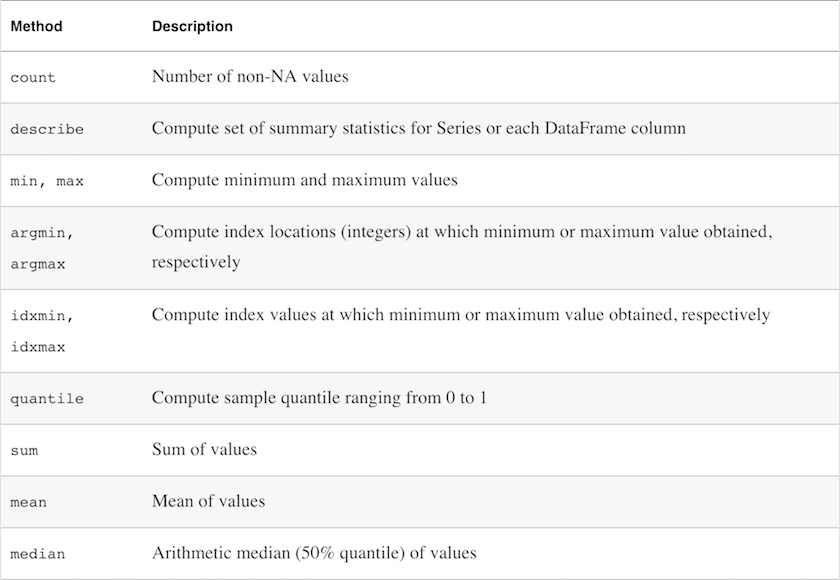

## Table of Descriptive and Summary Statistics (2 of 2)

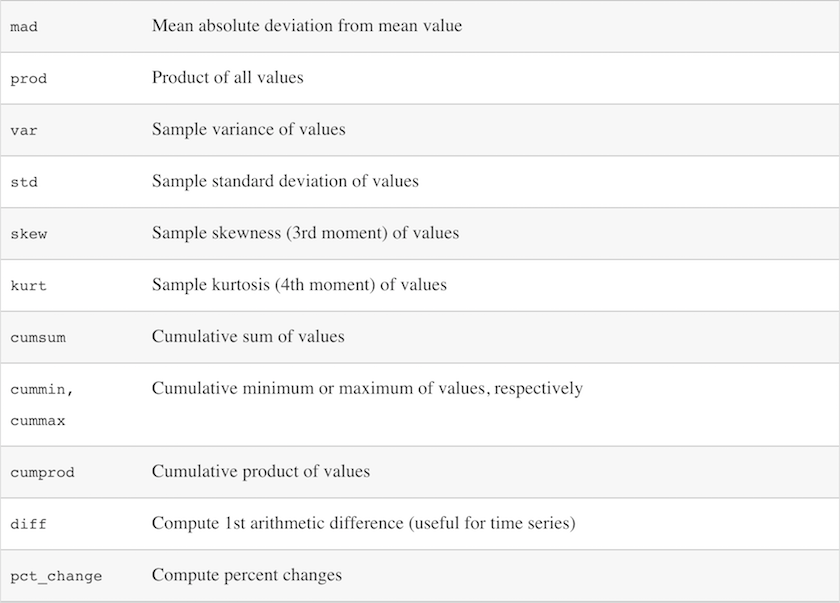

## Unique Values, Value Counts, and Membership

-  <code>**unique**</code> is a function that gives you an array of the unique values in a <code>**Series**</code>.

-  The unique values are not necessarily returned in sorted order, but could be sorted afterwards (e.g., by calling <code>**np.sort()**</code>).

-  <code>**value_counts**</code> computes a <code>**Series**</code> containing value frequencies.

-  <code>**isin**</code> performs a vectorized set membership check.

In [95]:
"""
Usage of unique method.
"""
# Create a Series object
s = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
# Get unique values and store them in a variable
uniques = s.unique()
print("Unique values are: {}".format(uniques))
print("Unique sorted values are: {}".format(np.sort(uniques)))

Unique values are: ['c' 'a' 'd' 'b']
Unique sorted values are: ['a' 'b' 'c' 'd']


In [96]:
"""
Usage of value_counts method.
"""
# Either as a method
print("Value counts:\n{}".format(s.value_counts(sort=False)))
print()
# Or as a built-in pandas function
print("Value counts:\n{}".format(pd.value_counts(s, sort=False)))

Value counts:
a    3
d    1
c    3
b    2
dtype: int64

Value counts:
a    3
d    1
c    3
b    2
dtype: int64


In [97]:
"""
Usage of isin method.
"""
# Create a boolean mask
mask = s.isin(['b', 'c'])
print("Boolean mask:\n{}".format(mask))
print()
print("Accessing elements of the Series object using the mask:\n{}".format(s[mask]))

Boolean mask:
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

Accessing elements of the Series object using the mask:
0    c
5    b
6    b
7    c
8    c
dtype: object


In [98]:
"""
Many times, it will be useful to compute a histogram on multiple columns in a DataFrame.
"""
data = pd.DataFrame({'Q1': [1, 3, 4, 3, 4],
                     'Q2': [2, 3, 1, 2, 3],
                     'Q3': [1, 5, 2, 4, 4]})

print("Original dataset:\n{}".format(data))
print()
# Passing pandas.value_counts to this DataFrame's apply function gives the following
freq = data.apply(pd.value_counts).fillna(0)
print("Column-wise frequency table:\n{}".format(freq))

Original dataset:
   Q1  Q2  Q3
0   1   2   1
1   3   3   5
2   4   1   2
3   3   2   4
4   4   3   4

Column-wise frequency table:
    Q1   Q2   Q3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


In [99]:
# If we specify axis=1 the frequency is computed row-wise
freq = data.apply(pd.value_counts, axis=1).fillna(0)
print("Row-wise frequency table:\n{}".format(freq))

Row-wise frequency table:
     1    2    3    4    5
0  2.0  1.0  0.0  0.0  0.0
1  0.0  0.0  2.0  0.0  1.0
2  1.0  1.0  0.0  1.0  0.0
3  0.0  1.0  1.0  1.0  0.0
4  0.0  0.0  1.0  2.0  0.0


## Table of Unique, Value Counts, and Set Membership Methods

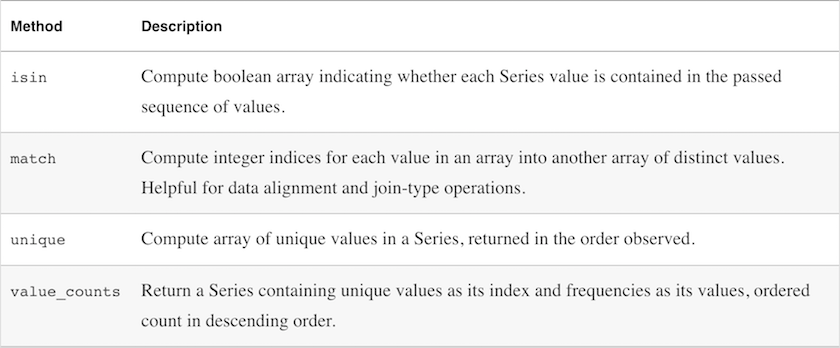

#I/O with <code>pandas</code>

## Overview

-  Accessing data is a necessary first step for any data scientist. 

-  We are going to see how to perform data input/output operations using <code>**pandas**</code>.

-  I/O might refer to: reading from/writing to text files (or other more efficient on-disk formats), accessing databases, interacting with network sources like web APIs, etc.

-  We will be exploring each of those separately (although we will be focusing more on text files).

## Parsing functions in <code>pandas</code> (2 of 2)

```
# Ques*to è formattato come codice*
```



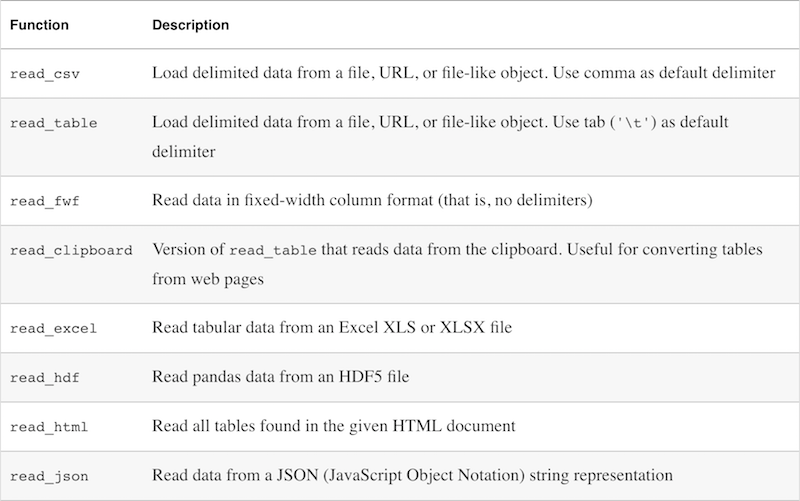

## Parsing functions in <code>pandas</code> (2 of 2)

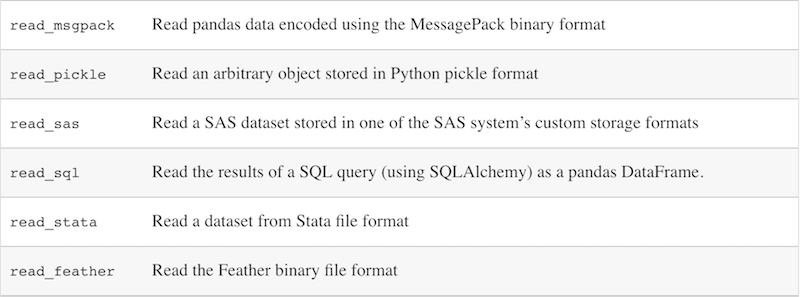

## Loading Data into <code>DataFrame</code> Objects

-  All the functions listed above allow <code>**pandas**</code> to read tabular data as a <code>**DataFrame**</code> object. 

-  Among those, <code>**read_csv**</code> and <code>**read_table**</code> are by far the ones you'll likely use the most.

## Optional Arguments to <code>read_*</code> Functions

-  **Indexing:** can treat one or more columns as the returned <code>**DataFrame**</code>, and whether to get column names from the file, the user, or not at all.

-  **Type inference and data conversion:** this includes the user-defined value conversions and custom list of missing value markers.

-  **Datetime parsing:** includes combining date and time information spread over multiple columns into a single column in the result.

-  **Iterating:** support for iterating over chunks of very large files.

-  **Unclean data issues:** skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.

## Too Many Optional Arguments

-  Because of how messy data in the real world can be, some of the data loading functions (especially <code>**read_csv**</code>) have grown very complex over time. 

-  To avoid feeling ovewhelmed by the huge number of possible options, please refer to the [online pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

-  Type inference is one of the more important features of these functions; that means you don't necessarily have to specify which columns are numeric, integer, boolean, or string.

## <code>read_csv</code>/<code>read_table</code>

-  We will explore some of the most important I/O features provided by <code>**pandas**</code> using an example.

-  To this end, we use a tabular data file located on a remote server.

-  To check out how such a file looks like, just click [here](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user).

-  Of course, you can save this file on your machine and load it locally from there with <code>**pandas**</code>.

-  By default, data is assumed to be **tab-separated** (<code>**'\t'**</code>).

In [100]:
"""
Let's start with a real example on how to load a tabular data file using pandas.
"""
# Locate the dataset (in this case, we use a remote file located on an external server)
# Alternatively, you can save this file on your machine and load it locally from there.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
# The first line of the file represents the header, and each field
# is separated by a pipe
"""
We specify the url where the data is located, the character used to separate fields ('|')
and the name of the column to use as row label (otherwise, RangeInteger will be used)
"""
users = pd.read_csv(url, sep='|', index_col='user_id')
print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


## Reading files from other data sources: 
- Google drive
- github
- local file (not really suggested on colab since at every session data are need to be reload. 

### Google drive

The copy and paste of the key needs to be done everytime

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
"""
Suppose we have stored the file on our drive.
"""
path = '/content/drive/Shareddrives/MD2SL-material/data/user_occupations.txt'
users = pd.read_csv(path, sep='|', index_col='user_id')
print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


### From github

In [105]:
"""
Suppose we have stored the file on our github repository.
"""
path = 'https://raw.githubusercontent.com/fpinell/hands_on_python_for_ds/main/data/user_occupations.txt'

users = pd.read_csv(path, sep='|', index_col='user_id')
print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


### From "local" file

In [106]:
"""
Suppose we have stored the file on our github repository.
"""
path = 'data/user_occupations.txt'

users = pd.read_csv(path, sep='|', index_col='user_id')
print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


In [107]:
"""
Suppose the file does not contain any header line. We can still load the file
telling pandas there is no header AND we can also provide pandas with a list 
of names corresponding to the header we want to use.
"""
directory = '/content/drive/Shareddrives/MD2SL-material/data/'

# This is the path to the same file yet without the header line
path_no_header = directory+'user_occupations_no_header.txt'
# If the file does not contain the header as the first line
users = pd.read_csv(path_no_header, sep='|', header=None)
# Row and column indices fall back to the default RangeIndex (i.e., integers)
print(users.head(10))

    0   1  2              3      4
0   1  24  M     technician  85711
1   2  53  F          other  94043
2   3  23  M         writer  32067
3   4  24  M     technician  43537
4   5  33  F          other  15213
5   6  42  M      executive  98101
6   7  57  M  administrator  91344
7   8  36  M  administrator  05201
8   9  29  M        student  01002
9  10  53  M         lawyer  90703


In [108]:
'''
If the file does not contain the header as the first line AND we want to
# specify ourselves the names of the columns (and, possibly, the row index as well)
'''
users = pd.read_csv(path_no_header, sep='|', header=None, 
                    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
                   index_col='user_id')

print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


In [109]:
# Sometimes, it may be useful to skip some records of the input file.
# Here, we skip the first, third and fourth (actual) record.
users_skip = pd.read_csv(path_no_header, sep='|', header=None, 
                    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
                   index_col='user_id',
                   skiprows=[0, 2, 3])

print(users_skip.head(10))

         age gender     occupation zip_code
user_id                                    
2         53      F          other    94043
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703
11        39      F          other    30329
12        28      F          other    06405
13        47      M       educator    29206


## Handling Missing Values (*NA* or *Not Available*)

-  Missing data is usually either not present (i.e., empty string) or marked by some **sentinel** value. 

-  By default, <code>**pandas**</code> uses a set of commonly occurring sentinels, such as <code>**None**</code> and <code>**NaN**</code>.

-  The <code>**na_values**</code> is used to customize sentinel values by adding to the default ones either a list or set of strings to consider missing values.

In [111]:
"""
Suppose we want to mark as NA any entry whose value is 'N/A'.
"""
path = directory+'user_occupations.txt'
# Load again the data with the option for handling missing values (na_values)
users = pd.read_csv(path, sep='|', index_col='user_id', na_values=['N/A'])
# Alternatively, we can define a dictionary of sentinels, i.e., a set for each column.
sentinels = {'age': ['inf', 'N/A'], 'zipcode': ['00000']}
users = pd.read_csv(path, sep='|', index_col='user_id', na_values=sentinels)
print(users.head(10))

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703


## <code>read_csv</code>/<code>read_table</code> Function Arguments

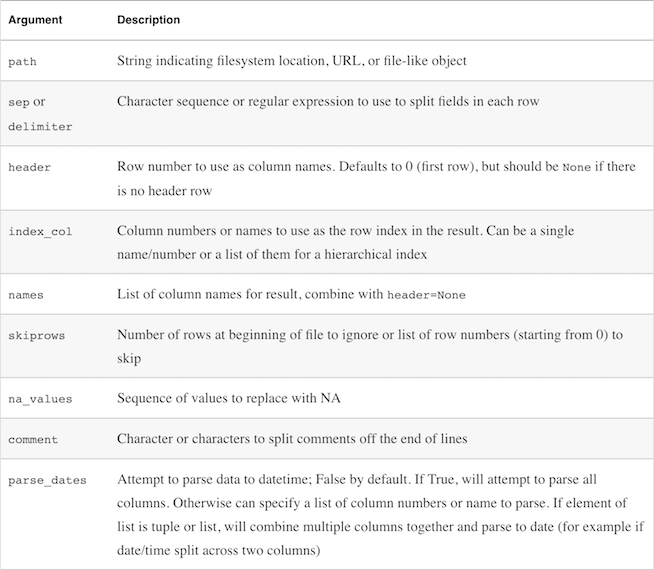

## <code>read_csv</code>/<code>read_table</code> Function Arguments

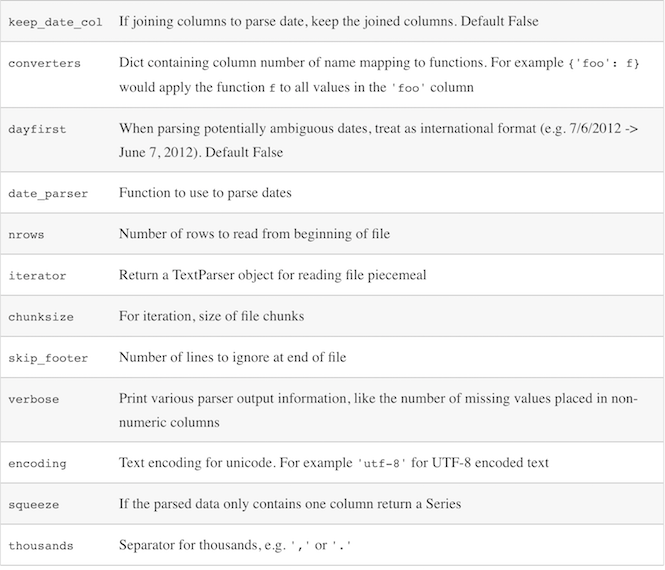

## Reading Text Files in Pieces

-  When processing very large files, you may only want to read in a small piece of a file or iterate through smaller chunks of the file.

-  If we want to only read out a small number of rows (avoiding reading the entire file), specify that with <code>**nrows**</code>.

In [112]:
"""
Suppose we want to just read 100 records from our file.
"""
# Specify the number of rows to be read
users_100 = pd.read_csv(path, sep='|', index_col='user_id', nrows=100)
# Verify that we actually read that many rows
print("Number of observations (#rows) = {}".format(users_100.shape[0]))
users_100.head()


Number of observations (#rows) = 100


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [114]:
"""
Let's reload the dataset from the remote file.
"""
users = pd.read_csv(path, sep='|', index_col='user_id')
print(users.head())
users.head()

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [115]:
"""
Let's print out some information about the data we just loaded.
"""
print("Number of observations (#rows) = {}".format(users.shape[0]))
print("Number of fields (#columns) = {}".format(users.shape[1]))
print("Column names = [{}]".format(", ".join([c for c in users.columns])))
print("The index (i.e., the labels) is:\n{}".format(users.index))
print("The data types of each column are:\n{}".format(users.dtypes))

Number of observations (#rows) = 943
Number of fields (#columns) = 4
Column names = [age, gender, occupation, zip_code]
The index (i.e., the labels) is:
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)
The data types of each column are:
age            int64
gender        object
occupation    object
zip_code      object
dtype: object


In [116]:
"""
Suppose we want to access a single column of the DataFrame.
"""
# Let's return the first 5 values of the 'occupation' column.
print(users['occupation'][:5]) # alternatively, use users['occupation'].head()
print()
# The same can be obtained using '.' notation
print(users.occupation[:5]) # alternatively, use users.occupation.head()

user_id
1    technician
2         other
3        writer
4    technician
5         other
Name: occupation, dtype: object

user_id
1    technician
2         other
3        writer
4    technician
5         other
Name: occupation, dtype: object


In [117]:
"""
Suppose we want to access a single column of the DataFrame.
"""
# Let's return the first 5 values of the 'occupation' column.
print(users.loc[:5,'occupation'])

user_id
1    technician
2         other
3        writer
4    technician
5         other
Name: occupation, dtype: object


In [118]:
"""
Let's now create a deep copy of the loaded DataFrame 'users'.
Remember: assigning another name to the same DataFrame is simple a view.
For example, users_df = users makes users_df point to the same users. As such,
any change to the content of the DataFrame while working on users_df is reflected to users.
"""
# Make a deep copy of users
users_df = users.copy()
print(users_df.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [119]:
"""
Let's add an extra column to the DataFrame and populate this column
with some values (e.g., a series)
"""
# Suppose we want to add an extra column 'salary', which we randomly populate
# with values in the range [5000, 1000000]
np.random.seed(42) # Initialize internal state of the random number generator
BASE_SALARY = 5000
values = pd.Series(np.random.randint(995000, size=users_df.shape[0]) + BASE_SALARY)
print(values.head())

0    126958
1    676155
2    136932
3    370838
4    264178
dtype: int64


In [120]:

"""
Before we actually "join" the Series we have just created with our users DataFrame,
we need the index of both objects to be aligned. Otherwise, there won't be any salary
associated with the DataFrame row index 943, as the Series index is shifted by 1 w.r.t.
the index of our DataFrame. Let's specify the index when creating our salary values.
"""
np.random.seed(42) # Initialize internal state of the random number generator
BASE_SALARY = 5000
values = pd.Series(np.random.randint(995000, size=users_df.shape[0]) + BASE_SALARY,
                  index=users_df.index)
print(values.head())

user_id
1    126958
2    676155
3    136932
4    370838
5    264178
dtype: int64


In [121]:
# Create a new column on the users_df DataFrame and populate this with
# the Series we just created
users_df['salary'] = values
print(users_df.head())

         age gender  occupation zip_code  salary
user_id                                         
1         24      M  technician    85711  126958
2         53      F       other    94043  676155
3         23      M      writer    32067  136932
4         24      M  technician    43537  370838
5         33      F       other    15213  264178


In [122]:
# We can access multiple columns of this new DataFrame as follows.
print("Occupation and Salary of the first 5 users:\n{}".
      format(users_df[['occupation', 'salary']].head()))

Occupation and Salary of the first 5 users:
         occupation  salary
user_id                    
1        technician  126958
2             other  676155
3            writer  136932
4        technician  370838
5             other  264178


In [123]:
"""
Wait! We might not want to associate a salary to each entry!
For example, you don't want to assign a salary to any user aged less than 18
or anyone who doesn't have a job or is a student.
Let's see what are the set of occupations.
"""
users_df['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [130]:
"""
Create a mask to assign a salary only to those users who are at least 18 AND
are not student nor unoccupied.
We therefore set salary to 0 for any of the users above
"""
mask = (users_df.age >= 18) & ~(users_df.occupation.isin(['student', 'none']))
#mask = (users_df.age >= 18) & (users_df.occupation != 'student') \
#& (users_df.occupation != 'none')
# mask = (users_df.age >= 18) & ~(users_df.occupation == 'student') \
# & ~(users_df.occupation == 'none')

In [131]:
users_df['salary'] = users_df['salary'].where(mask, 0)
users_df.head(10)

,age,gender,occupation,zip_code,salary
user_id,,,,,
1,24,M,technician,85711,126958
2,53,F,other,94043,676155
3,23,M,writer,32067,136932
4,24,M,technician,43537,370838
5,33,F,other,15213,264178
6,42,M,executive,98101,649167
7,57,M,administrator,91344,115268
8,36,M,administrator,05201,737180
9,29,M,student,01002,0


In [126]:
# Alternatively
users_df['salary'] = np.where(mask, users_df['salary'], 0)
users_df.head(10)

,age,gender,occupation,zip_code,salary
user_id,,,,,
1,24,M,technician,85711,126958
2,53,F,other,94043,676155
3,23,M,writer,32067,136932
4,24,M,technician,43537,370838
5,33,F,other,15213,264178
6,42,M,executive,98101,649167
7,57,M,administrator,91344,115268
8,36,M,administrator,05201,737180
9,29,M,student,01002,0


In [132]:
"""
Use integer slicing (special behavior to select rows)
"""
# Note that this integer slicing operator cannot be extended on both axis,
# as in numpy. In other words, you cannot use the same
# syntax to slice over rows and columns with something like 
# users2[i_start:i_stop, j_start:j_stop]
# In order to use integer slicing on BOTH axis as above, we need to use the .iloc method
print("First 7 rows of the DataFrame:\n{}".format(users_df[:7]))

First 7 rows of the DataFrame:
         age gender     occupation zip_code  salary
user_id                                            
1         24      M     technician    85711  126958
2         53      F          other    94043  676155
3         23      M         writer    32067  136932
4         24      M     technician    43537  370838
5         33      F          other    15213  264178
6         42      M      executive    98101  649167
7         57      M  administrator    91344  115268


In [133]:
"""
Select all the users in the DataFrame whose salary is greater than 500k
"""
# This is a boolean mask which returns a Series containing either True or False
# corresponding to each entry index of the DataFrame depending on whether that entry
# has a salary which is greater than 500k or not.
mask = users_df.salary > 500000
print(mask.head(7))
print()
print("The list of first 5 users having salary greater than 500k is:\n{}"
      .format(users_df[mask].head()))

user_id
1    False
2     True
3    False
4    False
5    False
6     True
7    False
Name: salary, dtype: bool

The list of first 5 users having salary greater than 500k is:
         age gender     occupation zip_code  salary
user_id                                            
2         53      F          other    94043  676155
6         42      M      executive    98101  649167
8         36      M  administrator    05201  737180
11        39      F          other    30329  526430
12        28      F          other    06405  959698


In [134]:

"""
Suppose I want to select only female users whose salary is greater than 500k
"""
#mask = 
print(mask.head(7))
print()
print("The list of first 5 female users having salary greater than 500k is:\n{}"
      .format(users_df[(users_df.salary > 500000) & (users_df.gender == 'F')].head()))

user_id
1    False
2     True
3    False
4    False
5    False
6     True
7    False
Name: salary, dtype: bool

The list of first 5 female users having salary greater than 500k is:
         age gender occupation zip_code  salary
user_id                                        
2         53      F      other    94043  676155
11        39      F      other    30329  526430
12        28      F      other    06405  959698
15        49      F   educator    97301  917756
24        21      F     artist    94533  723315


In [135]:

"""
Let's use loc and iloc methods to index both axis (i.e., rows and columns)
using either index/column labels (loc) or integers (iloc).
"""
# Note that in this special case, index (row) labels are integers...
# In cases like this, loc falls back to work like .iloc
print("user_id: 1 and 4 (ROWS); gender, salary, zip_code (COLUMNS):\n{}"
      .format(users_df.loc[[1, 4], ['gender', 'salary', 'zip_code']]))
print()
print("user_id: 1 and 4 (ROWS); 2nd, 5th, 4th (COLUMNS):\n{}"
      .format(users_df.iloc[[0, 3], [1, 4, 3]]))

user_id: 1 and 4 (ROWS); gender, salary, zip_code (COLUMNS):
        gender  salary zip_code
user_id                        
1            M  126958    85711
4            M  370838    43537

user_id: 1 and 4 (ROWS); 2nd, 5th, 4th (COLUMNS):
        gender  salary zip_code
user_id                        
1            M  126958    85711
4            M  370838    43537


In [136]:

"""
Suppose we want to sort the DataFrame by age (ascending) and salary (descending)
"""
print(users_df.sort_values(by=['age', 'salary'], ascending=[True, False]).head())

         age gender occupation zip_code  salary
user_id                                        
30         7      M    student    55436       0
471       10      M    student    77459       0
289       11      M       none    94619       0
142       13      M      other    48118       0
609       13      F    student    55106       0


In [137]:

"""
To make the above more meaningful, let's just consider only when salary is > 0
"""
print(users_df[users_df.salary > 0].sort_values(by=['age', 'salary'], 
                                                ascending=[True, False]).head(10))

         age gender occupation zip_code  salary
user_id                                        
620       18      F     writer    81648  719998
851       18      M      other    29646  522923
507       18      F     writer    28450  398002
925       18      F   salesman    49036  155159
859       18      F      other    06492   31790
747       19      M      other    93612  981535
601       19      F     artist    99687  755201
35        20      F  homemaker    42459  994436
596       20      M     artist    77073  749840
677       20      M      other    99835  748583


In [138]:
"""
Suppose we want to see what is the average salary of the users.
"""
# Let's first consider ALL the users (also those who have 0 salary)
print("The average salary across ALL the users is: {:.2f}"
      .format(users_df.salary.mean()))
# Let's now filter out from the mean computation any user whose salary is 0
print("The average salary across all working users is: {:.2f}"
      .format(users_df[users_df.salary > 0].salary.mean()))

The average salary across ALL the users is: 369708.87
The average salary across all working users is: 474333.96


In [139]:
"""
Let's see what is the median age of the users in our DataFrame.
"""
print("The median age across ALL the users is: {}"
      .format(users_df.age.median()))

The median age across ALL the users is: 31.0


In [140]:

"""
Let's see what happens if we call 'describe()' on this DataFrame
"""
print(users_df.describe()) # Notice, only numeric columns are part of the description!

              age         salary
count  943.000000     943.000000
mean    34.051962  369708.865323
std     12.192740  324238.271411
min      7.000000       0.000000
25%     25.000000   42366.500000
50%     31.000000  310062.000000
75%     43.000000  653225.000000
max     73.000000  994873.000000


In [141]:

# Let's try to include all the columns in the description
print(users_df.describe(include = "all"))

               age gender occupation zip_code         salary
count   943.000000    943        943      943     943.000000
unique         NaN      2         21      795            NaN
top            NaN      M    student    55414            NaN
freq           NaN    670        196        9            NaN
mean     34.051962    NaN        NaN      NaN  369708.865323
std      12.192740    NaN        NaN      NaN  324238.271411
min       7.000000    NaN        NaN      NaN       0.000000
25%      25.000000    NaN        NaN      NaN   42366.500000
50%      31.000000    NaN        NaN      NaN  310062.000000
75%      43.000000    NaN        NaN      NaN  653225.000000
max      73.000000    NaN        NaN      NaN  994873.000000


In [144]:
"""
Sometimes it is useful to know how the values of a particular attribute (i.e., column)
is distributed over the data instances that we have.
"""
# Let's first see how many unique occupations are on our dataset (already saw this above)
unique_occupations = users_df.occupation.unique()
number_of_occupations = users_df.occupation.nunique()

print("There are {} unique occupation values (with nunique() {}), which are as follows:\n[{}]"
      .format(unique_occupations.shape[0],number_of_occupations, 
              ", ".join([o.title() for o in np.sort(unique_occupations)])))

There are 21 unique occupation values, or with nunique() 21, which are as follows:
[Administrator, Artist, Doctor, Educator, Engineer, Entertainment, Executive, Healthcare, Homemaker, Lawyer, Librarian, Marketing, None, Other, Programmer, Retired, Salesman, Scientist, Student, Technician, Writer]


In [145]:
"""
Now let's see how many times each unique value of the 'occupation' column
appears across the dataset. In other words, we compute the frequency count (a.k.a. histogram)
of the 'occupation' attribute.
"""
print("Histogram of occupation values:\n{}"
      .format(pd.value_counts(users_df.occupation, sort=True)))

Histogram of occupation values:
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64


## Working with Binary File Formats

-  One of the easiest ways to efficiently work with data in **binary format** is using Python's built-in [<code>**pickle**</code>](https://docs.python.org/3/library/pickle.html) serialization/de-serialization.

-  This module essentially provides the ability to serialize (de-serialize) **any** Python object to (from) disk.

-  Serialize means writing out a binary representation of an object, whilst de-serialize is the inverse operation.

-  <code>**pandas**</code> objects all have a <code>**to_pickle**</code> method which writes data to disk in <code>**pickle**</code> format, whereas there exists a <code>**pandas.read_pickle**</code> method to deserialize objects back from disk.

In [146]:
"""
Suppose we want to serialize out to disk (in binary format) a DataFrame,
which we previously loaded from a text file.
"""
# Let's use again the same text file as above
path = directory+'user_occupations.txt'
users = pd.read_csv(path, sep='|', index_col='user_id')
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [147]:
"""
Suppose we want to serialize out to (de-serialize in from) disk 
a DataFrame (in binary format), which we previously loaded from a text file.
"""
# Let's serialize this DataFrame object out to a binary file on disk
binary_outfilename = directory+'user_occupations.pickle'
# the same as pickle.dump(users, open(binary_outfilename, 'wb'))
users.to_pickle(binary_outfilename)
# Let's de-serialize the binary representation of the object back
users_from_binary = pd.read_pickle(binary_outfilename)
# This has given us back the DataFrame object we previously serialized
print(users_from_binary.head())


         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


# Data preparation / manipulation

## What Does Data Preparation Mean?

-  It typically consists of **loading**, **cleaning**, **transforming**, and **rearranging** data (the last three steps are also referred to as data **"munging"**). 

-  Such tasks are often reported to take up 80% or more of your development time (for a machine learning/data science task). 

-  Sometimes it can be achieved by using a mixture of tools, i.e., from general-purpose programming languages, like Python, Perl, R, or Java, to UNIX tools like <code>**sed**</code> or <code>**awk**</code>.

-  Luckily, <code>**pandas**</code> provides you with a single, high-level, flexible, and fast set of tools to enable you to manipulate data into the right form.

## Our Focus

1.  Handling missing data (**NA** or **N**ot **A**vailable)

2.  Dealing with duplicates

3.  Managing very extreme values (i.e., **outliers**)

4.  Combining multiple datasets into a single one

In [150]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
# The first line of the file represents the header, and each field
# is separated by a pipe
"""
We specify the url where the data is located, the character used to separate fields ('|')
and the name of the column to use as row label (otherwise, RangeInteger will be used)
"""
users = pd.read_csv(url, sep='|', index_col='user_id')
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


## Handling Missing Data (*NA*)

-  Missing data (**NA**) may either be data that does not exist or that exists but was not observed (e.g., due to measurement issues).

-  <code>**pandas**</code> makes working with missing data as painless as possible. For example, all of the descriptive statistics on <code>**pandas**</code> objects exclude **NA** by default.

-  <code>**pandas**</code> represents **NA** using so-called **sentinel values**.

-  Two of the most common sentinel values are <code>**None**</code> and the floating point value <code>**NaN**</code> (**N**ot **a** **N**umber).

In [151]:
"""
Let's see if there are any missing data (NA) on our loaded dataset.
"""

# isnull() returns a boolean DataFrame with the same shape of the DataFrame object
# where you invoke the method. Each entry of this new boolean DataFrame either contains
# True or False depending on whether the corresponding entry in the original DataFrame
# is missing or not
print("Shape of the boolean DataFrame: {}\n".format(users.isnull().shape))
print(users.isnull().head())

Shape of the boolean DataFrame: (943, 4)

           age  gender  occupation  zip_code
user_id                                     
1        False   False       False     False
2        False   False       False     False
3        False   False       False     False
4        False   False       False     False
5        False   False       False     False


In [152]:
"""
In order to see which column has at least one missing value,
we can call the method any() on the boolean DataFrame above.
This returns a boolean Series which contains an entry for each column 
(row aggregation) which evaluates to True if at least one element
of that column is True, False otherwise.
"""
print("Shape of the boolean Series: {}\n".format(users.isnull().any().shape))
print(users.isnull().any().head())

Shape of the boolean Series: (4,)

age           False
gender        False
occupation    False
zip_code      False
dtype: bool


In [154]:
"""
We have verified that our dataset does not contain any missing value.
What if, though, I would like to obtain a row-wise (i.e., column aggregation)
boolean Series containing a value for each row, which tells me whether that
row contains or not at least one NA value?
"""

print("Shape of the boolean Series: {}\n".format(users.isnull().any(axis=1).shape))
print(users.isnull().any(axis=1).head())

Shape of the boolean Series: (943,)

user_id
1    False
2    False
3    False
4    False
5    False
dtype: bool


In [155]:
"""
In order to find whether there exists at least one NA on the whole DataFrame
we can simply aggregate one more time the boolean Series above using another any()
"""

print("Q: Is there at least a missing value in our DataFrame? A: {}".
      format(users.isnull().any().any()))

Q: Is there at least a missing value in our DataFrame? A: False


In [158]:
"""
Of course, the same thing can be achieved using different approaches.
This is possibly the quickest solution.
"""

# values returns a 2-D numpy array (ndarray) and any() "flatten" it 
print("Q: Is there at least a missing value in our DataFrame? A: {}".
      format(users.isnull().values.any()))

print("Q: Which is the total number of missing values on our DataFrame? A: {}".
      format(users.isnull().values.sum()))

Q: Is there at least a missing value in our DataFrame? A: False
Q: Which is the total number of missing values on our DataFrame? A: 0


In [159]:

"""
Can we achieve the same using a different aggregation function?


This solution makes exactly the same 3 steps as above but instead of computing
boolean aggregation from the boolean DataFrame, it sum boolean values over the rows
(i.e., column-wise) and finally makes a final aggregation step (sum) to obtain
the number of missing values of the DataFrame.
NOTE: this is generally slower but it provides you with an extra information
(i.e., how many NA values are in the DataFrame, not just a boolean value!)
"""
print("There are {} missing values (NA) in the DataFrame".
      format(users.isnull().sum().sum()))

There are 0 missing values (NA) in the DataFrame


In [160]:
"""
Suppose we want to randomly perturbate our dataset with some missing values.
First of all, let's create a deep copy of our original DataFrame.
"""

# Prepare the deep copy of the DataFrame where we are going to randomly insert
# some missing values (NA)
users_with_na = users.copy()

In [163]:
"""
Let's create a uniform random sample of size=10 drawn from the range [1, 943]
"""
np.random.seed(42)
row_indices = np.random.randint(1, 944, size=10)
# alternatively, use np.random.choice(np.arange(1, 944), size=10, replacement=False)
print("Random row indices: {}".format(row_indices))

Random row indices: [103 436 861 271 107  72 701  21 615 122]



We are going to use the first half of the randomly selected indices
for populating with np.NaN the column 'age', whilst the second half
is going to be used to set to None the column 'occupation'.
The two middle indices will be used for both. 
In other words:
- rows labeled as 103, 436, 861, 271 will be used to
set column 'age' to np.NaN
- rows labeled as 701, 21, 615, 122 will be used to
set column 'occupation' as None
- rows labeled as 107 and 72 will be used to set both
column 'age' to np.NaN and column 'occupation' to None


In [165]:
print("Let's first extract the records we want to update for column 'age':\n{}".
      format(users_with_na.loc[row_indices[:6], 'age']))

Let's first extract the records we want to update for column 'age':
user_id
103    26
436    30
861    38
271    51
107    39
72     48
Name: age, dtype: int64


In [166]:
print("Let's first extract the records we want to update for column 'age':\n{}".
      format(users_with_na.loc[row_indices[:6], 'age']))

Let's first extract the records we want to update for column 'age':
user_id
103    26
436    30
861    38
271    51
107    39
72     48
Name: age, dtype: int64


In [167]:
print("Let's now extract the records we want to update for column 'occupation':\n{}".
      format(users_with_na.loc[row_indices[4:], 'occupation']))
# I swear, I didn't do it on purpose! 
# This was truly the outcome of a purely (pseudo-)random experiment but apparently
# 'scientist' will be sacrificed and set to None

Let's now extract the records we want to update for column 'occupation':
user_id
107        scientist
72     administrator
701        librarian
21            writer
615         educator
122           writer
Name: occupation, dtype: object


In [168]:
"""
Let's set the values as we planned.
"""
users_with_na.loc[row_indices[:6], 'age'] = np.nan
users_with_na.loc[row_indices[4:], 'occupation'] = None
# NOTE: the same won't work if we use something like the following:
# users_with_na.loc[row_indices[:6]]['age'] = np.nan
# users_with_na.loc[row_indices[4:]]['occupation'] = None
# This is because in case of [] operator, we are actually 
# accessing a copy of the selected slice, whereas above we are working on a view.
# More information on this - a.k.a. SettingWithCopyWarning - is available here: 
# https://www.dataquest.io/blog/settingwithcopywarning/

In [169]:
"""
Let's verify if changes actually took place!
"""
print("Let's see how column 'age' looks like:\n{}".
      format(users_with_na.loc[row_indices[:6], 'age']))
print()
print("Let's see how column 'occupation' looks like:\n{}".
      format(users_with_na.loc[row_indices[4:], 'occupation']))

Let's see how column 'age' looks like:
user_id
103   NaN
436   NaN
861   NaN
271   NaN
107   NaN
72    NaN
Name: age, dtype: float64

Let's see how column 'occupation' looks like:
user_id
107    None
72     None
701    None
21     None
615    None
122    None
Name: occupation, dtype: object


In [170]:

"""
Now, let's try to see if the tests above we run for finding any NA work correctly.
"""
print("Q: Is there at least a missing value in our DataFrame? A: {}".
      format(users_with_na.isnull().any().any()))
print()
print("There are {} missing values (NA) in the DataFrame".
      format(users_with_na.isnull().sum().sum()))

Q: Is there at least a missing value in our DataFrame? A: True

There are 12 missing values (NA) in the DataFrame


In [171]:

"""
You may want to drop rows or columns of a DataFrame which are all NA 
or only those containing any NAs. 
The pandas.dropna function by default drops any row containing a missing value.
By default, dropna returns a new object but we can specify inplace=True for
any in-place change.
"""

# This will drop all the rows containing at least one NA
cleaned_users = users_with_na.dropna()
# After issuing the above command, we are expecting the DataFrame to have 10 rows less
# (i.e., 933 instead of 943)
print("Number of records in the original DataFrame = {}\n".format(users_with_na.shape[0]))
print("Number of records in the cleaned DataFrame = {}".format(cleaned_users.shape[0]))


Number of records in the original DataFrame = 943

Number of records in the cleaned DataFrame = 933


In [172]:

"""
If we instead want to delete only those rows which are FULL of NAs,
then we have to pass how='all' to dropna.
"""
# This will drop all the rows containing ALL NAs
cleaned_users_all = users_with_na.dropna(how='all')
# After issuing the above command, how many rows will be dropped?
print("Number of records in the original DataFrame = {}\n".format(users_with_na.shape[0]))
print("Number of records in the cleaned DataFrame = {}".format(cleaned_users_all.shape[0]))

Number of records in the original DataFrame = 943

Number of records in the cleaned DataFrame = 943


In [173]:

"""
As usual, dropna works on rows (axis 0) by default.
Instead, if we want to delete columns corresponding to a missing value
we can pass axis=1 argument to dropna.
"""
# This will drop all the columns containing at least one NA
cleaned_users_columns = users_with_na.dropna(axis=1)

### How many columns are we expecting the above command will drop?

In [174]:
# After issuing the above command, weare expecting the DataFrame to have 2 columns less
# (i.e., 2 instead of 4, as 'age' and 'occupation' have both at least one NA value)
print("Number of records in the original DataFrame = {}\n".format(users_with_na.shape[1]))
print("Number of records in the cleaned DataFrame = {}".format(cleaned_users_columns.shape[1]))

Number of records in the original DataFrame = 4

Number of records in the cleaned DataFrame = 2


In [175]:
"""
'fillna' fill in missing data with some values, rather than filtering them out.
"""
# Suppose we fill all missing values with 0 (not in-place, otherwise set inplace=True)
users_fill_na = users_with_na.fillna(0)
# Let's verify if changes actually took place!
print("Let's see how column 'age' looks like:\n{}".
      format(users_fill_na.loc[row_indices[:6], 'age']))
print()
print("Let's see how column 'occupation' looks like:\n{}".
      format(users_fill_na.loc[row_indices[4:], 'occupation']))

Let's see how column 'age' looks like:
user_id
103    0.0
436    0.0
861    0.0
271    0.0
107    0.0
72     0.0
Name: age, dtype: float64

Let's see how column 'occupation' looks like:
user_id
107    0
72     0
701    0
21     0
615    0
122    0
Name: occupation, dtype: object


In [176]:

"""
We can also pass a dictionary to fillna in order to specify
different values to replace NA with.
"""
users_fill_na = users_with_na.fillna({'age': 0, 'occupation': 'none'})
# Let's verify if changes actually took place!
print("Let's see how column 'age' looks like:\n{}".
      format(users_fill_na.loc[row_indices[:6], 'age']))
print()
print("Let's see how column 'occupation' looks like:\n{}".
      format(users_fill_na.loc[row_indices[4:], 'occupation']))

Let's see how column 'age' looks like:
user_id
103    0.0
436    0.0
861    0.0
271    0.0
107    0.0
72     0.0
Name: age, dtype: float64

Let's see how column 'occupation' looks like:
user_id
107    none
72     none
701    none
21     none
615    none
122    none
Name: occupation, dtype: object


## Removing Duplicates


In [177]:
"""
The DataFrame method duplicated() returns a boolean Series 
indicating whether each row is a duplicate or not.
"""
# Let's go back to our original DataFrame
print("Duplicated rows:\n{}".format(users.duplicated().head()))
print()

Duplicated rows:
user_id
1    False
2    False
3    False
4    False
5    False
dtype: bool



In [178]:
# What if I would like to see if there exists at least one duplicated row?
print("Q: Is there at least one duplicated row? A: {}"
      .format(users.duplicated().any()))

Q: Is there at least one duplicated row? A: True


In [179]:

# Suppose I want to extract only the duplicated rows
print("Duplicated rows:\n{}".format(users[users.duplicated()]))

Duplicated rows:
         age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301


In [185]:
"""
By default, if you have 3 duplicated rows, only the last two will be
marked as duplicates (i.e., the first occurrence is kept).
This can be changed by specifying the parameters 'keep'
keep : {'first', 'last', False}, default 'first'
first : Mark duplicates as True except for the first occurrence.
last : Mark duplicates as True except for the last occurrence.
False : Mark all duplicates as True.
"""
# Suppose I want to extract only the duplicated rows, this time considering them all
print("Duplicated rows:\n{}".format(users[users.duplicated(keep=False)].sort_values(by='zip_code')))


Duplicated rows:
         age gender occupation zip_code
user_id                                
85        51      M   educator    20003
572       51      M   educator    20003
437       27      F      other    20009
805       27      F      other    20009
198       21      F    student    55414
428       28      M    student    55414
496       21      F    student    55414
684       28      M    student    55414
67        17      M    student    60402
621       17      M    student    60402
460       44      F      other    60630
733       44      F      other    60630
350       32      M    student    97301
890       32      M    student    97301


In [186]:

"""
Relatedly, drop_duplicates() returns a DataFrame where the duplicated array is False.
"""
# Remove duplicated rows (keeping the first occurrence of each duplicates)
users_with_no_dup = users.drop_duplicates()
# What if I would like to see if there exists at least one duplicate row, now?
print("Q: Is there at least one duplicated row? A: {}"
      .format(users_with_no_dup.duplicated().any()))
print()
print("Total number of rows after removing duplicated rows = {}"
      .format(users_with_no_dup.shape[0]))

Q: Is there at least one duplicated row? A: False

Total number of rows after removing duplicated rows = 936


In [187]:

"""
We can also specify the same 'keep' argument to decide on how to
mark duplicates, and therefore remove them
"""
# Remove ALL duplicated rows
users_with_no_dup = users.drop_duplicates(keep=False)
# What if I would like to see if there exists at least one duplicate row, now?
print("Q: Is there at least one duplicated row? A: {}"
      .format(users_with_no_dup.duplicated().any()))
print()
print("Total number of rows after removing duplicated rows = {}"
      .format(users_with_no_dup.shape[0]))

Q: Is there at least one duplicated row? A: False

Total number of rows after removing duplicated rows = 929


In [188]:

"""
By default, both duplicated() and drop_duplicates() consider all of the columns; 
alternatively we can specify any subset of them to detect duplicates. 
Suppose we want to filter duplicates only based on the 'gender' and 'occupation' columns.
"""
# Suppose I want to extract only the duplicated rows w.r.t. 'gender' and 'occupation'
print("There are {} duplicated rows having the same 'gender' and 'occupation'.\n\
The following are the first 5 of them:\n{}"
      .format(users[users.duplicated(['gender', 'occupation'])].shape[0],
              users[users.duplicated(['gender', 'occupation'])].head()))

There are 902 duplicated rows having the same 'gender' and 'occupation'.
The following are the first 5 of them:
         age gender     occupation zip_code
user_id                                    
4         24      M     technician    43537
5         33      F          other    15213
8         36      M  administrator    05201
11        39      F          other    30329
12        28      F          other    06405


## Transforming Data Using a Function or Mapping

In [189]:
"""
For many data sets, we may wish to perform some transformation based on the values
in an array, Series, or column in a DataFrame.
"""
# Suppose we want to add a column indicating the salary for each occupation. 
# Let's write down a mapping of each occupation to salary
occupation_to_salary = {'technician': 25000, 'administrator': 150000,
                        'writer': 40000, 'executive': 300000, 'other': 18000,
                        'student': 1300, 'lawyer': 27500, 'educator': 45000,
                        'scientist': 60000, 'entertainment': 185000, 'programmer': 55000,
                        'librarian': 22000, 'homemaker': 240000, 'artist': 72000,
                        'engineer': 91000, 'marketing': 66000, 'none': 0,
                        'healthcare': 41000, 'retired': 52000, 'salesman': 48000,
                        'doctor': 140000
                       }

In [190]:

"""
The map method on a Series accepts a function or dict-like object containing a mapping.
"""
users['salary'] = users['occupation'].map(occupation_to_salary)
print(users.head())

         age gender  occupation zip_code  salary
user_id                                         
1         24      M  technician    85711   25000
2         53      F       other    94043   18000
3         23      M      writer    32067   40000
4         24      M  technician    43537   25000
5         33      F       other    15213   18000


In [191]:
"""
Alternatively, we could also have passed to map a lambda function that does all the work.
"""
# Let's first delete the salary column
del users['salary']
# Verify the column is really removed
print(users.head())

# lambda function
users['salary'] = users['occupation'].map(lambda x: occupation_to_salary[x])
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213
         age gender  occupation zip_code  salary
user_id                                         
1         24      M  technician    85711   25000
2         53      F       other    94043   18000
3         23      M      writer    32067   40000
4         24      M  technician    43537   25000
5         33      F       other    15213   18000


## Replacing Values

In [192]:
"""
Filling in missing data with the 'fillna' method is a special case 
of more general value replacement. 
While 'map' can be used to modify a subset of values in an object, 
'replace' provides a simpler and more flexible way to do so.
"""
# Suppose we would like to consider 'none' value of 'occupation' as missing data
# (i.e., 'none' can be considered as a sentinel value)
# NOTE: remember that this can be also specified when loading the DataFrame
# by specifying na_values
users['occupation'] = users['occupation'].replace('none', np.nan)
print("The number of replaced rows is = {}"
      .format(users[(users['occupation'].isnull())].shape[0]))
print("The following are the first 5 rows that have been replaced:\n{}"
      .format(users[(users['occupation'].isnull())].head()))

The number of replaced rows is = 9
The following are the first 5 rows that have been replaced:
         age gender occupation zip_code  salary
user_id                                        
57        16      M        NaN    84010       0
127       33      M        NaN    73439       0
130       20      M        NaN    60115       0
256       35      F        NaN    39042       0
289       11      M        NaN    94619       0


In [198]:
# Suppose I want to update the salary column corresponding to
# those rows where 'occupation' is now missing
mask = users['occupation'].notnull()
# Update 'salary' where 'occupation' is null. The semantics is as follows.
# 'salary' will keep its value if the mask condition is verified
# (i.e., if 'occupation' is NOT null, otherwise we set it to NaN)
users['salary'] = users['salary'].where(mask, np.nan)
print(users[~mask])

         age gender occupation zip_code  salary
user_id                                        
57        16      M        NaN    84010     NaN
127       33      M        NaN    73439     NaN
130       20      M        NaN    60115     NaN
256       35      F        NaN    39042     NaN
289       11      M        NaN    94619     NaN
418       55      F        NaN    21206     NaN
628       13      M        NaN    94306     NaN
657       26      F        NaN    78704     NaN
756       30      F        NaN    90247     NaN


In [199]:
print("The number of replaced rows is = {}"
      .format(users[(users['occupation'].isnull()) & (users['salary'].isnull())].shape[0]))
print("The following are the first 5 rows that have been replaced:\n{}"
      .format(users[(users['occupation'].isnull()) & (users['salary'].isnull())].head()))

The number of replaced rows is = 9
The following are the first 5 rows that have been replaced:
         age gender occupation zip_code  salary
user_id                                        
57        16      M        NaN    84010     NaN
127       33      M        NaN    73439     NaN
130       20      M        NaN    60115     NaN
256       35      F        NaN    39042     NaN
289       11      M        NaN    94619     NaN


In [200]:
# Let's go back to the original occupation and salary
users = users.fillna({'occupation': 'none'})
users['salary'] = users['occupation'].map(lambda o: occupation_to_salary[o])

## Discretization and Binning

-  Continuous data is often **discretized** or otherwised separated into "**bins**" for analysis. 

-  The typical example is given by the case where you have user's data containing information like 'age', and you what to divide users in a set of fixed age intervals.

In [201]:
"""
Let's consider our 'age' column and suppose we want to divide these into bins, 
such as users aged between 0 and 17, 18 to 25, 26 to 35, 
36 to 55, and finally 56 and older. To do so, we can use pandas.cut function.
"""
# Let's first define a list containing the left-most extreme of each bin
bins = [0, 18, 26, 36, 56, 100]
"""
Consistent with mathematical notation for intervals, a parenthesis ')' 
means that the side is OPEN while the square bracket '[' means it is closed (inclusive). 
By default, intervals are left-open, i.e., (a, b]
Passing 'right=False' those become right-open, i.e., [a, b) 
"""
age_intervals = pd.cut(users['age'], bins, right=False)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1    [18, 26)
2    [36, 56)
3    [18, 26)
4    [18, 26)
5    [26, 36)
Name: age, dtype: category
Categories (5, interval[int64]): [[0, 18) < [18, 26) < [26, 36) < [36, 56) < [56, 100)]


In [202]:
"""
The object pandas returns is a special Categorical object. 
We can treat it like an array of strings indicating the bin name; 
internally it contains a categories array indicating the distinct category names 
along with a labeling for the ages data in the 'codes' attribute
"""
print("Categorical bin codes: {}".format(age_intervals.cat.codes.head()))
print("Categorical bin names: {}".format(age_intervals.cat.categories))

Categorical bin codes: user_id
1    1
2    3
3    1
4    1
5    2
dtype: int8
Categorical bin names: IntervalIndex([[0, 18), [18, 26), [26, 36), [36, 56), [56, 100)],
              closed='left',
              dtype='interval[int64]')


In [203]:
"""
Instead of integer labeling for the bin, we can specify which label
to assign to each bin.
"""
age_labels = ['Young', 'Young_Adult', 'Adult', 'Middle_Aged', 'Senior']
age_intervals = pd.cut(users['age'], bins, labels=age_labels, right=False)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1    Young_Adult
2    Middle_Aged
3    Young_Adult
4    Young_Adult
5          Adult
Name: age, dtype: category
Categories (5, object): ['Young' < 'Young_Adult' < 'Adult' < 'Middle_Aged' < 'Senior']


In [204]:
"""
Let's create an extra column 'age_interval' on the DataFrame with this information.
"""
users['age_interval'] = pd.cut(users['age'], bins, labels=age_labels, right=False)
print(users.head())

         age gender  occupation zip_code  salary age_interval
user_id                                                      
1         24      M  technician    85711   25000  Young_Adult
2         53      F       other    94043   18000  Middle_Aged
3         23      M      writer    32067   40000  Young_Adult
4         24      M  technician    43537   25000  Young_Adult
5         33      F       other    15213   18000        Adult


In [205]:
"""
Sometimes we don't want to specify the intervals ourselves, instead
we want to just specify the number of bins and let pandas figure out how 
data are distributed across those bins.
"""
# If we pass 'cut' an integer number of bins instead of explicit bin edges, 
# it will compute equal-length bins based on the minimum and maximum values in the data. 
age_intervals = pd.cut(users['age'], 5, right=False)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1    [20.2, 33.4)
2    [46.6, 59.8)
3    [20.2, 33.4)
4    [20.2, 33.4)
5    [20.2, 33.4)
Name: age, dtype: category
Categories (5, interval[float64]): [[7.0, 20.2) < [20.2, 33.4) < [33.4, 46.6) < [46.6, 59.8) <
                                    [59.8, 73.066)]


In [206]:
# The same as above, but with labels
age_labels = ['Young', 'Young_Adult', 'Adult', 'Middle_Aged', 'Senior']
age_intervals = pd.cut(users['age'], 5, labels=age_labels, right=False)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1    Young_Adult
2    Middle_Aged
3    Young_Adult
4    Young_Adult
5    Young_Adult
Name: age, dtype: category
Categories (5, object): ['Young' < 'Young_Adult' < 'Adult' < 'Middle_Aged' < 'Senior']


In [207]:
"""
A closely related function 'qcut' bins the data based on sample quantiles. 
Depending on the distribution of the data, using 'cut' will not usually result 
in each bin having the same number of data points. 
Instead, with 'qcut' by definition we will obtain roughly equal-size bins.
"""
# We are using quartiles here [0.25, 0.50, 0.75, 1]
# Alternatively, we can specify the list of our own quantiles 
# (i.e., numbers between 0 and 1, inclusive)
age_intervals = pd.qcut(users['age'], 4)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1    (6.999, 25.0]
2     (43.0, 73.0]
3    (6.999, 25.0]
4    (6.999, 25.0]
5     (31.0, 43.0]
Name: age, dtype: category
Categories (4, interval[float64]): [(6.999, 25.0] < (25.0, 31.0] < (31.0, 43.0] < (43.0, 73.0]]


In [208]:
# The same as above yet with labels
age_labels = ['Young', 'Adult', 'Middle_Aged', 'Senior']
age_intervals = pd.qcut(users['age'], 4, labels=age_labels)
print("Ages: {}".format(users['age'].head()))
print("Categorical ranges: {}".format(age_intervals.head()))

Ages: user_id
1    24
2    53
3    23
4    24
5    33
Name: age, dtype: int64
Categorical ranges: user_id
1          Young
2         Senior
3          Young
4          Young
5    Middle_Aged
Name: age, dtype: category
Categories (4, object): ['Young' < 'Adult' < 'Middle_Aged' < 'Senior']


## Combining <code>pandas</code> Objects

-  Data contained in <code>**pandas**</code> objects (i.e., <code>**Series**</code> and <code>**DataFrame**</code>) can be combined together in a number of built-in ways, such as:

    -  <code>**pandas.merge**</code>/<code>**pandas.join**</code> connects rows of two objects based on one or more keys. This is equivalent to **join** operations on relational databases.

    -  <code>**pandas.concat**</code> concatenates or "stacks" together objects along a specific axis, if any (there is only a single possible axis of concatenation for <code>**Series**</code>).

-  Full API documentation is available [here](https://pandas.pydata.org/pandas-docs/stable/merging.html)

## Database-style <code>DataFrame</code> Joins

In [209]:
"""
Merge or join operations combine data sets by linking rows using one or more keys. 
These operations are central to relational databases (e.g., SQL-based). 
The 'merge' function in pandas is the main entry point for achieving this.
"""
# Let's go back to our original DataFrame
del users['salary']
del users['age_interval']
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


## What is a Join/Merge Operation?

-  Generally speaking, "joining" ("merging") two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.

-  Typical operation in relational databases using <code>**SQL JOIN**</code> operator.

-  In <code>**pandas**</code> there are two different functions <code>**merge**</code> and <code>**join**</code>, both of which do similar things; the former is used for column-to-column joins, whereas the latter is more efficient when joining <code>**DataFrame**</code> objects on their indices.

## The Anatomy of a Join/Merge Operation

```python
merged_df = pd.merge(left_df, right_df, 
                     left_on=["l_col_1",...,"l_col_n"], 
                     right_on=["r_col_1",...,"r_col_n"],
                     how="{left|right|inner|outer}"
```

## The Anatomy of a Join/Merge Operation

-  <code>**left_df**</code> and <code>**right_df**</code> are the two <code>**DataFrame**</code> objects we want to merge.

-  <code>**left_on**</code> and <code>**right_on**</code> indicate the column(s) used for the merging operation on the left and right <code>**DataFrame**</code> objects, respectively (alternatively, use just <code>**on=[col_1,...,col_n]**</code> if column names are the same on both <code>**DataFrame**</code>s).

-  <code>**how**</code> is used to specify which kind of merge operation needs to be performed, i.e., one of: <code>**left**</code>, <code>**right**</code>, <code>**inner**</code> (default), and <code>**outer**</code>.

## Different Types of Join/Merge Operations

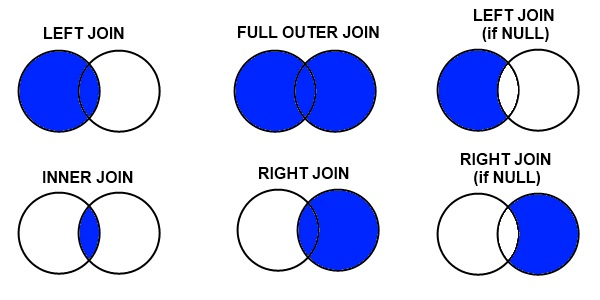
<center>[Image Source](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/)</center>

-  **Inner Merge/Inner Join** (default): Keep only those rows where the value which we want to merge on exists in **both** the **left** and **right** <code>**DataFrame**</code>s.

-  **Left Merge/Left (Outer) Join**: Keep every row in the **left** <code>**DataFrame**</code>. If some values of the column we are merging on are missing in the **right** <code>**DataFrame**</code>, add <code>**NaN**</code> to the result.

-  **Right Merge/Right (Outer) Join**: Keep every row in the **right** <code>**DataFrame**</code>. If some values of the column we are merging on are missing in the **left** <code>**DataFrame**</code>, add <code>**NaN**</code> to the result.

-  **Outer Merge/Full (Outer) Join**: Return **all** the rows from the **left** and the **right** <code>**DataFrame**</code>s, matches up rows where possible, otherwise add <code>**NaN**</code>.

In [210]:
# Suppose we have another DataFrame containing the (average) salary for some occupations. 
# Let's assume we don't have salary information for 'technician' and 'other'
# but we do for two extra occupations (e.g., 'gardener' and 'professor')
occupation_salary_data = {'occupation': ['administrator', 'writer', 'executive', 
                                       'student', 'lawyer', 'educator', 
                                       'scientist', 'entertainment', 
                                       'programmer', 'librarian', 'homemaker', 
                                       'artist', 'engineer', 'marketing', 
                                       'none', 'healthcare', 'retired', 
                                       'salesman', 'doctor', 'gardener', 
                                       'professor'],
        'salary': [150000, 40000, 300000, 1300, 27500, 45000, 
                      60000, 185000, 55000, 22000, 240000, 72000, 
                      91000, 66000, 0, 41000, 52000, 48000, 
                      140000, 16000, 82000]}

occupation_salary = pd.DataFrame(occupation_salary_data)
print("Occupation-Salary data:\n{}".format(occupation_salary.head()))

Occupation-Salary data:
      occupation  salary
0  administrator  150000
1         writer   40000
2      executive  300000
3        student    1300
4         lawyer   27500


In [212]:
"""
By default, 'merge' tries to join DataFrames on the basis of common column names.
In our example there is a column called 'occupation', which is common to both DataFrames.
Moreover, 'merge' implements an INNER JOIN, which means that the resulting DataFrame 
will contain all and only those records which match on both the left and right DataFrame. 
"""
merged = pd.merge(users, occupation_salary)
# The above is equivalent to:
# merged = users.merge(occupation_salary)
# Or:
# merged = pd.merge(users, occupation_salary, 
#                   left_on="occupation", right_on="occupation", how="inner")
# Or, again:
# merged = pd.merge(users, occupation_salary, on="occupation", how="inner")
print(merged.head())


   age gender occupation zip_code  salary
0   23      M     writer    32067   40000
1   26      M     writer    30068   40000
2   25      M     writer    40206   40000
3   32      M     writer    55369   40000
4   21      M     writer    52245   40000


In [213]:
print("Number of records in the left DataFrame: {}"
      .format(users.shape[0]))
print("Number of records in the right DataFrame: {}"
      .format(occupation_salary.shape[0]))
print("Unique values of 'occupation' in the left DataFrame:\n{}".
      format(users.occupation.unique()))
print("Unique values of 'occupation' in the right DataFrame:\n{}".
      format(occupation_salary.occupation.unique()))

Number of records in the left DataFrame: 943
Number of records in the right DataFrame: 21
Unique values of 'occupation' in the left DataFrame:
['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']
Unique values of 'occupation' in the right DataFrame:
['administrator' 'writer' 'executive' 'student' 'lawyer' 'educator'
 'scientist' 'entertainment' 'programmer' 'librarian' 'homemaker' 'artist'
 'engineer' 'marketing' 'none' 'healthcare' 'retired' 'salesman' 'doctor'
 'gardener' 'professor']


In [214]:
print("Number of records in the resulting merged DataFrame: {}"
      .format(merged.shape[0]))
print(merged.head())

Number of records in the resulting merged DataFrame: 811
   age gender occupation zip_code  salary
0   23      M     writer    32067   40000
1   26      M     writer    30068   40000
2   25      M     writer    40206   40000
3   32      M     writer    55369   40000
4   21      M     writer    52245   40000


In [216]:
"""
Double check if the number of resulting rows after (inner) merge is compliant with
what we expect. Remember, inner merge results in a number of records which correspond
to the intersection of values on which we merge the 2 DataFrames on.
"""
# Let's see how many occupation values in the left DataFrame (users) 
# appear also in the right DataFrame (occupation_salary)
print("Number of 'occupation' values shared between the two DataFrames:\n{}"
      .format(users.occupation.isin(occupation_salary.occupation).value_counts()))

Number of 'occupation' values shared between the two DataFrames:
True     811
False    132
Name: occupation, dtype: int64


In [217]:
"""
Suppose we want to keep the records from the left DataFrame
"""
merged_left = pd.merge(users, occupation_salary, how='left')
print(merged_left.head())

   age gender  occupation zip_code   salary
0   24      M  technician    85711      NaN
1   53      F       other    94043      NaN
2   23      M      writer    32067  40000.0
3   24      M  technician    43537      NaN
4   33      F       other    15213      NaN


In [218]:
"""
How many records do we expect the resulting merged DataFrame above to have?
"""
print("Actual number of records: {}".format(merged_left.shape[0]))

Actual number of records: 943


In [219]:
"""
Suppose we want to keep the records from the right DataFrame
"""
merged_right = pd.merge(users, occupation_salary, how='right')
print(merged_right.head())

    age gender     occupation zip_code  salary
0  57.0      M  administrator    91344  150000
1  36.0      M  administrator    05201  150000
2  38.0      F  administrator    42141  150000
3  30.0      M  administrator    17870  150000
4  45.0      M  administrator    12550  150000


In [220]:
"""
How many records do we expect the resulting merged DataFrame above to have?
"""
print("Actual number of records: {}".format(merged_right.shape[0]))

Actual number of records: 813


In [223]:

"""
When we use 'merge' on column(s)-to-column(s) 
the indexes associated with the merging DataFrame objects are discarded.
"""
# Suppose we want to re-assign an Index object to the new merged DataFrame
# using the previous non-default index of the left DataFrame (users)
merged.index.name = 'user_id'
merged.index = users.index[users.occupation.isin(occupation_salary.occupation)]
print(merged.head())


         age gender occupation zip_code  salary
user_id                                        
3         23      M     writer    32067   40000
6         26      M     writer    30068   40000
7         25      M     writer    40206   40000
8         32      M     writer    55369   40000
9         21      M     writer    52245   40000


In [224]:
# Suppose we want to create another DataFrame containing the (average) salary
# for a set of 100 random users (i.e., not occupations)
# 1. Let's pick 100 user_ids uniformly at random
np.random.seed(73)
random_users = np.random.choice(users.index, 100, replace=False)
print("Selected number of random users = {}"
      .format(random_users.size))
print("Q: Is there any duplicates? A: {}"
      .format(pd.Series(random_users).duplicated().any()))
# print("Q: Is there any duplicates? A: {}"
#       .format())

Selected number of random users = 100
Q: Is there any duplicates? A: False


In [225]:

# 2. Let's do the same with the average salary.
# This time we extract a 100-sample drawn from a Normal distribution.
# To do so, we need to specify the two parameters of the distribution: 
# mean (mu) and standard deviation (sigma)
mu = 35000
sigma = 10000
normal_salaries = np.random.normal(mu, sigma, 100)

# Let's also round salaries to the 2nd decimal digit
normal_salaries = np.round(normal_salaries, decimals=2)
print(normal_salaries)

[30981.56  8141.63 35190.15 44115.61 24132.06 16727.61 48927.36 27547.46
 49555.67 36332.01 41391.36 27982.81 37830.65 15483.62 40403.92 60175.02
 33472.47 19418.07 38002.77 44214.56 37448.48 34731.41 53021.65 38271.18
 31676.24 45535.26 43835.62 25926.14 27368.06 21320.72 44023.01 16244.12
 26266.91 21005.97 31912.88 44578.75 32870.11 47079.2  36212.69 19605.45
 29392.86 27513.39 28542.01 46210.   37005.66 56131.39 37983.66 38348.63
 36761.72 39973.88 42339.71 31513.65 15944.47 17373.06 31026.4  28992.06
 28835.84 40750.78 32681.07 57893.89 16059.89 22922.55 44614.92 49297.13
 22567.51 17282.92 31271.47 30852.95 20738.12 21975.91 38762.06 29311.91
 40165.35 27991.55 38126.43 42298.47 43560.09 23849.68 51238.69 34521.12
 24627.77 36714.69 37096.64 42295.09 25258.02 29919.57 38273.35 33456.86
 36735.08 50284.15 23554.21 47794.98 31170.52 19485.41 44902.2  33108.2
 37306.   41465.11  9495.7  56661.99]


In [226]:
# 3. Let's now create the dictionary containing two keys: 'user_id' and 'salary'
# For each key, we associate the list of random_users and normal_salaries, respectively
user_to_salary_data = {'user_id': random_users, 'salary': normal_salaries}

# 4. We create the corresponding pandas DataFrame object
user_to_salary = pd.DataFrame(user_to_salary_data)
user_to_salary.set_index('user_id', inplace=True)
print("User-Salary data:\n{}".format(user_to_salary.head()))

User-Salary data:
           salary
user_id          
370      30981.56
797       8141.63
723      35190.15
516      44115.61
336      24132.06


In [227]:
# 4. Finally, merge (join) the original DataFrame (users) with this new one
# Merging uses the index this time, rather than the column as before
merged = pd.merge(users, user_to_salary, left_index=True, right_index=True)
# Note that if you don't specify that you are merging on indexes, 
# merge raises an error!
print(merged.head())

         age gender  occupation zip_code    salary
user_id                                           
18        35      F       other    37212  15483.62
21        26      M      writer    30068  50284.15
29        41      M  programmer    94043  60175.02
51        28      M    educator    16509  27982.81
81        21      M     student    21218  39973.88


## <code>pandas.merge</code> Arguments (1 of 2)

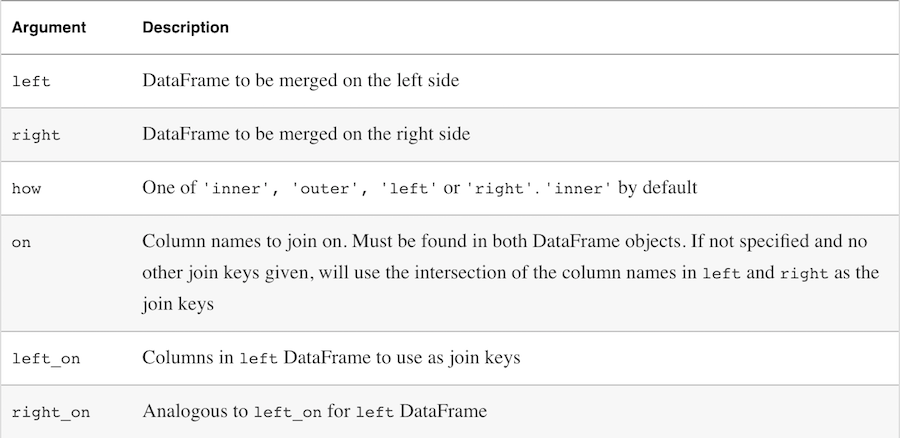

## <code>pandas.merge</code> Arguments (1 of 2)

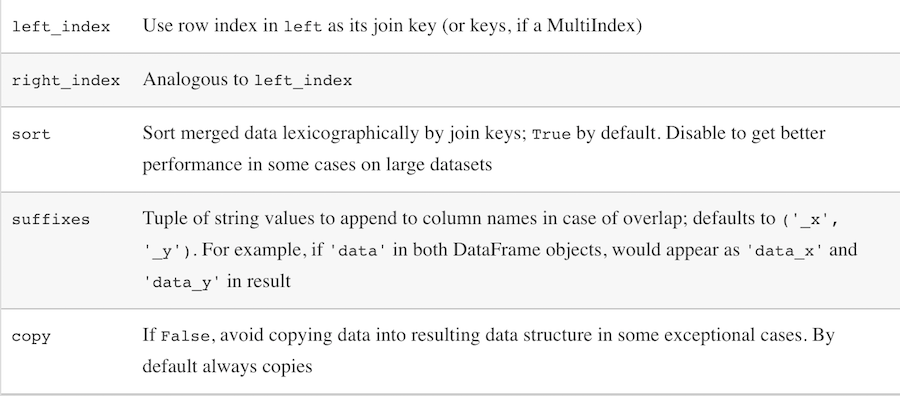
## Options for the <code>how</code> Argument

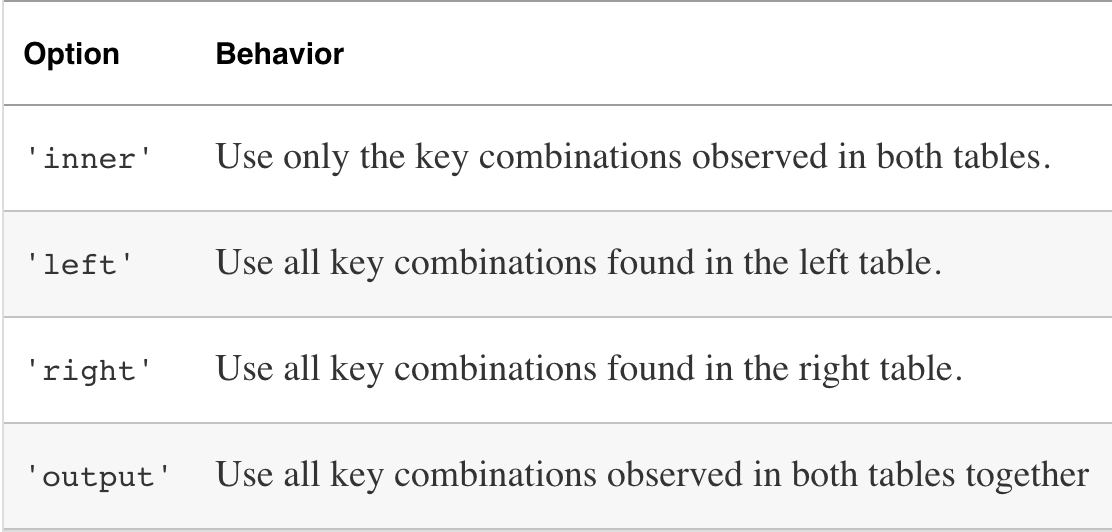

## Concatenating <code>DataFrame</code>s

In [228]:
"""
We can use the 'concat' function in pandas to append either rows or columns (if any) 
from one object to another. 
Let's grab two subsets of our DataFrame to see how this works.
"""
# Read in first 5 rows of users table
users_first_5 = users.head()
print("First 5 records of 'users':\n{}".format(users_first_5))
print()
# Read in the last 5 rows
users_last_5 = users[-5:]
print("Last 5 records of 'users':\n{}".format(users_last_5))

First 5 records of 'users':
         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213

Last 5 records of 'users':
         age gender     occupation zip_code
user_id                                    
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841


In [229]:
"""
We can use the 'concat' function in pandas to append either rows or columns (if any) 
from one object to another. 
Let's grab two subsets of our DataFrame to see how this works.
"""
# Read in first 5 rows of users table
users_first_5 = users.head()
print("First 5 records of 'users':\n{}".format(users_first_5))
print()
# Read in the last 5 rows
users_last_5 = users[-5:]
print("Last 5 records of 'users':\n{}".format(users_last_5))

First 5 records of 'users':
         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213

Last 5 records of 'users':
         age gender     occupation zip_code
user_id                                    
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841


## Stack "_vertically_" vs. "_horizontally_": <code>axis</code>

-  By default, <code>**concat**</code> operates on <code>**axis=0**</code> (i.e., **rows**) and tells <code>**pandas**</code> to stack the second DataFrame under the first one (i.e., **vertically**). 
    -  In order for this to work, we need to make sure that both <code>**DataFrame**</code>s have the same column names and formats. 

-  Instead, <code>**axis=1**</code> will stack the **columns** in the second <code>**DataFrame**</code> to the right of the first one (i.e., **horizontally**). 
    - In this case, we want to make sure that the data we stack are related in some way.

In [230]:
"""
Stack DataFrames vertically (i.e., using default axis=0)
"""
# Stack the two DataFrames 'users_first_5' and 'users_last_5' on top of each other
vertical_stack = pd.concat([users_first_5, users_last_5], axis=0)
print(vertical_stack)

         age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
939       26      F        student    33319
940       32      M  administrator    02215
941       20      M        student    97229
942       48      F      librarian    78209
943       22      M        student    77841


In [231]:
"""
Stack DataFrames horizontally (i.e., using axis=1)
"""
# Place the two DataFrames 'users_first_5' and 'users_last_5' side by side
horizontal_stack = pd.concat([users_first_5, users_last_5], axis=1)
print(horizontal_stack)

          age gender  occupation zip_code   age gender     occupation zip_code
user_id                                                                       
1        24.0      M  technician    85711   NaN    NaN            NaN      NaN
2        53.0      F       other    94043   NaN    NaN            NaN      NaN
3        23.0      M      writer    32067   NaN    NaN            NaN      NaN
4        24.0      M  technician    43537   NaN    NaN            NaN      NaN
5        33.0      F       other    15213   NaN    NaN            NaN      NaN
939       NaN    NaN         NaN      NaN  26.0      F        student    33319
940       NaN    NaN         NaN      NaN  32.0      M  administrator    02215
941       NaN    NaN         NaN      NaN  20.0      M        student    97229
942       NaN    NaN         NaN      NaN  48.0      F      librarian    78209
943       NaN    NaN         NaN      NaN  22.0      M        student    77841


In [232]:
"""
Since the row indexes for the two DataFrames 'users_first_5' and 'users_last_5' 
are not the same, 'concat' can't place them next to each other (NaN values occur). 
A workaround for this is to reindex our second DataFrame using the 'reset_index()' method.
"""
# Set the index of the second DataFrame to that of the first one
users_last_5.set_index(users_first_5.index, inplace=True)
horizontal_stack = pd.concat([users_first_5, users_last_5], axis=1)
print(horizontal_stack)

         age gender  occupation zip_code  age gender     occupation zip_code
user_id                                                                     
1         24      M  technician    85711   26      F        student    33319
2         53      F       other    94043   32      M  administrator    02215
3         23      M      writer    32067   20      M        student    97229
4         24      M  technician    43537   48      F      librarian    78209
5         33      F       other    15213   22      M        student    77841


In [233]:
"""
Since the row indexes for the two DataFrames 'users_first_5' and 'users_last_5' 
are not the same, 'concat' can't place them next to each other (NaN values occur). 
A workaround for this is to reindex our second DataFrame using the 'reset_index()' method.
"""
# Set the index of the second DataFrame to that of the first one
users_last_5.set_index(users_first_5.index, inplace=True)
# Or:
# users_last_5 = users_last_5.set_index(users_first_5.index)
horizontal_stack = pd.concat([users_first_5, users_last_5], axis=1)
print(horizontal_stack)

         age gender  occupation zip_code  age gender     occupation zip_code
user_id                                                                     
1         24      M  technician    85711   26      F        student    33319
2         53      F       other    94043   32      M  administrator    02215
3         23      M      writer    32067   20      M        student    97229
4         24      M  technician    43537   48      F      librarian    78209
5         33      F       other    15213   22      M        student    77841


In [ ]:
## <code>pandas.concat</code> Arguments



## <code>pandas.concat</code> Arguments

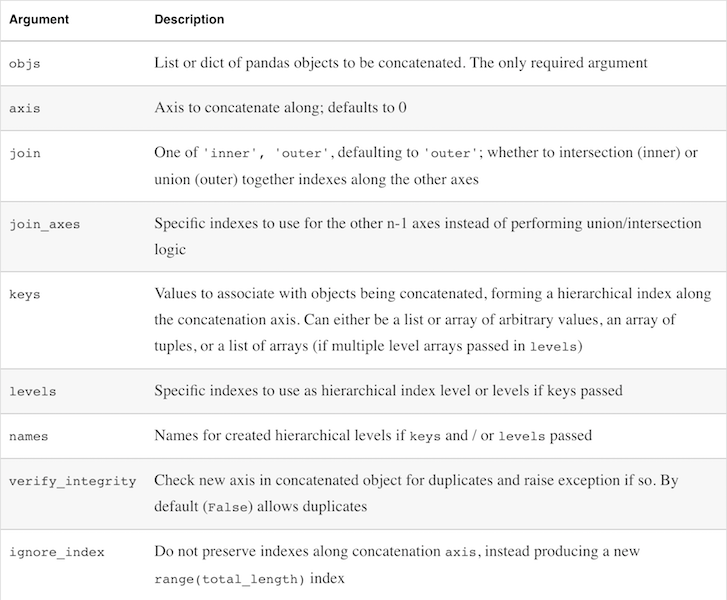

# Data Visualization with <code>matplotlib</code>

## Motivation

-  Making informative visualizations (sometimes called **plots**) is one of the most important tasks in data analysis. 

-  This may be a part of the "exploratory process"; for example, helping identify outliers, needed data transformations, or coming up with ideas for models. 

-  Python has many add-on libraries for making static or dynamic visualizations, but we will be focusing on [<code>**matplotlib**</code>](http://matplotlib.sourceforge.net) and libraries that build on top of it.

## What is <code>matplotlib</code>

-  <code>**matplotlib**</code> is a desktop plotting package designed for creating (mostly two-dimensional) plots. 

-  The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. 

-  The matplotlib and IPython communities have collaborated to simplify interactive plotting from the IPython shell, as well as Jupyter notebook. 

-  It supports various GUI backends on all operating systems and additionally can export graphics to all of the common vector and raster graphics formats: **PDF**, **SVG**, **JPG**, **PNG**, **BMP**, **GIF**, etc.

In [234]:
"""
Again, matplotlib is included in colab and the only thing we need
to do for using it is just to import it!
Actually, we need to import a "sub-module" of the whole matplotlib library, 
i.e., matplotlib.pyplot (https://matplotlib.org/api/pyplot_summary.html)
Let's also import both numpy and pandas, as those might be needed as well.
"""

import matplotlib.pyplot as plt
# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
%matplotlib inline
import seaborn as sns

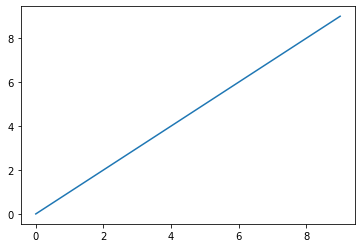

In [235]:
# Let's try to make our first matplotlib plot
# When 'plot' is given with just a single input argument, 
# this is considered as y values, 
# whilst x values are implicitly taken from the array [0..len(y)-1]
# '_' is a convention which is used in CPython interpreter to hold the result 
# of the last executed expression/statement in an interactive interpreter session.
_ = plt.plot(np.arange(10))

## Figures and Subplots

-  Plots in <code>**matplotlib**</code> are encapsulated within a <code>**Figure**</code> object. 

-  A new <code>**Figure**</code> object can be created with <code>**plt.figure**</code>.

-  In IPython, an empty plot window will appear, but in Jupyter Notebook nothing will be shown until we use a few more commands. 

-  <code>**plt.figure**</code> has a number of options, notably <code>**figsize**</code> will guarantee the figure has a certain size and aspect ratio if saved to disk.

-  We can't make a plot with a blank figure. We have to create one or more subplots using <code>**add_subplot**</code>.

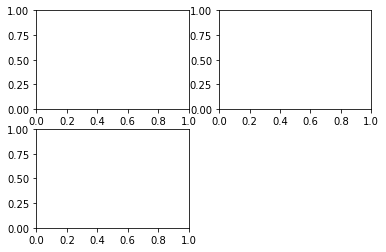

In [236]:
# Create a Figure object
fig = plt.figure()
# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)
# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)
# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)

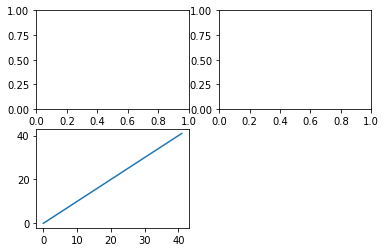

In [237]:
"""
If we issue a plt.plot command, matplotlib will draw on the last figure and subplot used
(creating one if necessary), thus hiding the figure and subplot creation
"""
# Create a Figure object
fig = plt.figure()
# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)
# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)
# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)
_ = plt.plot(np.arange(42))

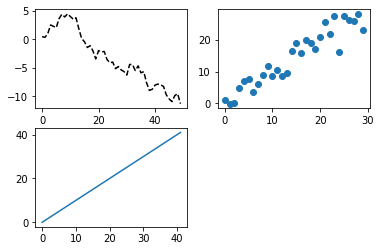

In [238]:
"""
The objects returned by fig.add_subplot above are AxesSubplot objects, 
We can directly plot on the other empty subplots by calling each one's instance methods.
"""
# Set the seed for random experiments
np.random.seed(42)
# Create a Figure object
fig = plt.figure()
# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)
# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)
# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)
# This will plot on the latest AxesSubplot (i.e., ax3)
_ = plt.plot(np.arange(42))
# Call the instance method on each AxesSubplot
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.
_ = ax1.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60ce16b90>,
      dtype=object)

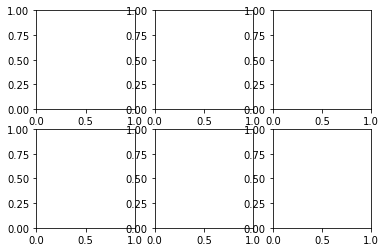

In [239]:
"""
Since creating a figure with a grid of subplots is such a common task, 
there is a convenience method 'plt.subplots' that creates a new figure 
and returns a numpy array containing the created subplot objects.
"""
# Create a figure which is made of 6 subplots (2x3)
fig, axes = plt.subplots(2, 3)
axes

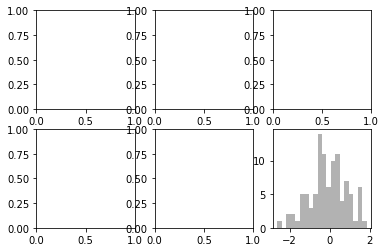

In [240]:
"""
This is very useful as the axes array can be easily indexed like a two-dimensional array; 
for example, axes[0, 1].
We can also indicate that subplots should have the same X or Y axis 
using 'sharex' and 'sharey', respectively. This is especially useful 
when comparing data on the same scale.
Otherwise, matplotlib auto-scales plot limits independently.
"""
# Set the seed for random experiments
np.random.seed(42)
# Create a figure whic is made of 6 subplots (2x3)
fig, axes = plt.subplots(2, 3)
# Plot on the bottom-right corner subplot 
_ = axes[1, 2].hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

## <code>pyplot.subplots</code> Arguments

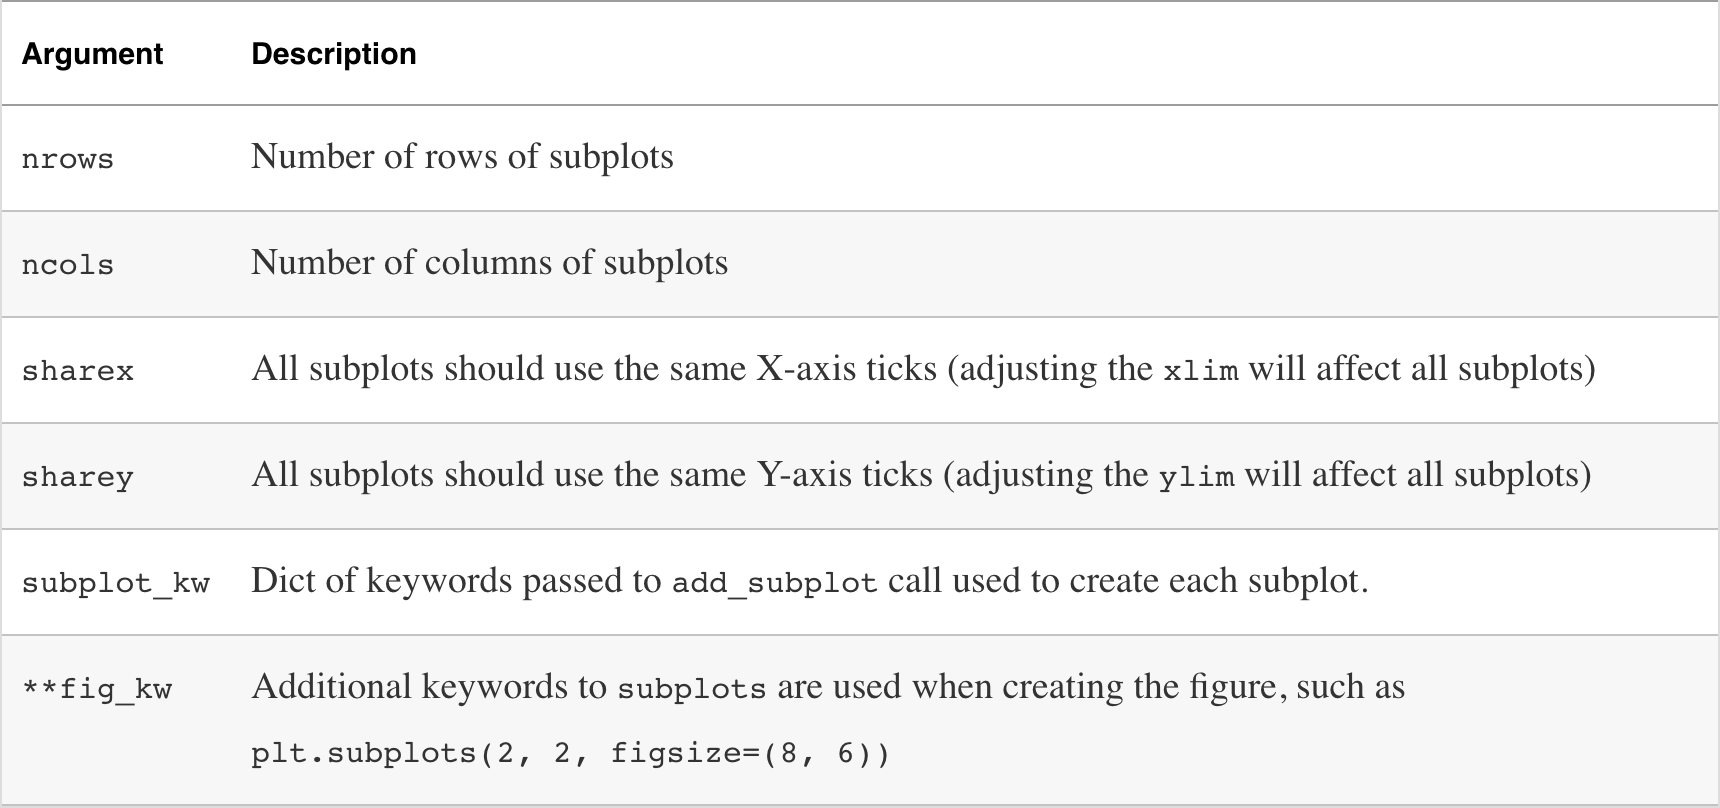

## Colors, Markers, and Line Styles

-  The main <code>**plot**</code> function accepts arrays of $x$ and $y$ coordinates, and optionally a string abbreviation indicating color and line style. 

-  For example, to plot $x$ versus $y$ with green dashes, you would execute:

```python
ax.plot(x, y, 'g--')
```
Or, equivalently:
```python
ax.plot(x, y, linestyle='--', color='g')
```

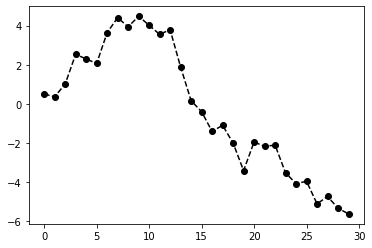

In [241]:
"""
Line plots can additionally have markers to highlight the actual data points. 
Since matplotlib creates a continuous line plot, interpolating between points, 
it can occasionally be unclear where the points lie. 
The marker can be part of the style string, which must have color 
followed by marker type and line style.
"""
np.random.seed(42)
_ = plt.plot(np.random.randn(30).cumsum(), 'ko--')
# Alternatively, we can write the above explicitly as follows
#plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

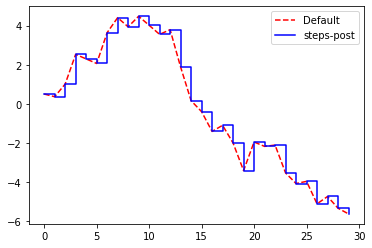

In [242]:
"""
If we want to change the default interpolation using line plots,
we can specify the argument 'drawstyle'
"""
np.random.seed(42)

data = np.random.randn(30).cumsum()
# First plot using the default interpolation
_ = plt.plot(data, 'r--', label='Default')
# Second plot (on the same Figure object) using steps
_ = plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
# Insert the legend located in the best possible position
_ = plt.legend(loc='best')

## Ticks, Labels, and Legends

-  2 possible ways of decorating plots: using the procedural  <code>**matplotlib.pyplot**</code> interface or object-oriented **matplotlib API**.

-  The pyplot interface exposes methods like <code>**xlim**</code> (range), <code>**xticks**</code> (tick locations), and <code>**xticklabels**</code> (tick labels).

-  They can be used in two ways:
    -  with no arguments returns the current parameter value. For example, <code>**plt.xlim()**</code> returns the current $x$-axis plotting range;
    -  with parameters sets the parameter value. So, <code>**plt.xlim([0, 10])**</code>, sets the $x$-axis range to 0 to 10.

## Ticks, Labels, and Legends

-  All such methods act on the active or most recently-created <code>**AxesSubplot**</code>. 

-  Each of them corresponds to two methods on the subplot object itself.

-  In the case of <code>**xlim**</code> these are <code>**ax.get_xlim**</code> and <code>**ax.set_xlim**</code>.

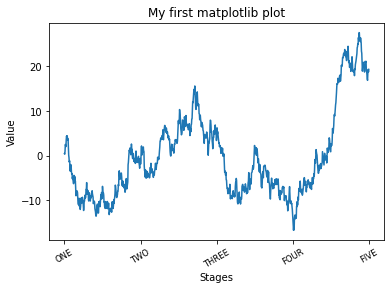

In [243]:
"""
Let's clarify the above concepts with an example.
"""
np.random.seed(42)
# Create a Figure object
fig = plt.figure()
# Create a 1x1 subplot and select this
ax = fig.add_subplot(1, 1, 1)
# Draw some random plot
_ = ax.plot(np.random.randn(1000).cumsum())
# To change the x-axis ticks, we use 'set_xticks' and 'set_xticklabels'. 
# The former instructs matplotlib where to place the ticks along the data range; 
# by default these locations will also be the labels. 
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# But we can set any other values as the labels using set_xticklabels
labels = ax.set_xticklabels(['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                            rotation=30, fontsize='small')
# We can also set a title to the plot
_ = ax.set_title('My first matplotlib plot')
# And x-axis (y-axis) labels
_ = ax.set_xlabel('Stages'); _ = ax.set_ylabel('Value')

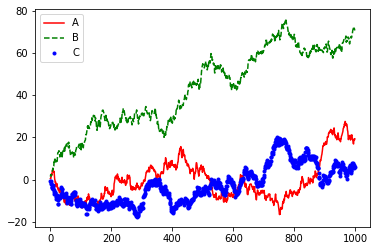

In [244]:
"""
Suppose we have multiple plots on the same Figure (or AxesSubplot).
Legends may help us distinguish between those plots.
"""
np.random.seed(42)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
_ = ax.plot(np.random.randn(1000).cumsum(), 'r', label='A')
_ = ax.plot(np.random.randn(1000).cumsum(), 'g--', label='B')
_ = ax.plot(np.random.randn(1000).cumsum(), 'b.', label='C')
_ = ax.legend(loc='best')

##  Saving Plots to File

-  The active figure can be saved to file using <code>**plt.savefig**</code>. 

-  This method is equivalent to the figure object's <code>**savefig**</code> instance method. 

-  For example, to save an **SVG** version of a figure, we can do as follows:
```python
plt.savefig('path/to/plotfile.svg')
```

## Saving Plots to File

-  The file type is inferred from the file extension.

-  Other important options might be: 
    -  <code>**dpi**</code>, which controls the dots-per-inch resolution;
    -  <code>**bbox_inches**</code>, which can trim the whitespace around the actual figure. 
    
-  To get the same plot as a **PNG** above with minimal whitespace around the plot and at 400 DPI:
```
plt.savefig('path/to/plotfile.png', dpi=400, bbox_inches='tight')
```

## <code>savefig<code> Arguments

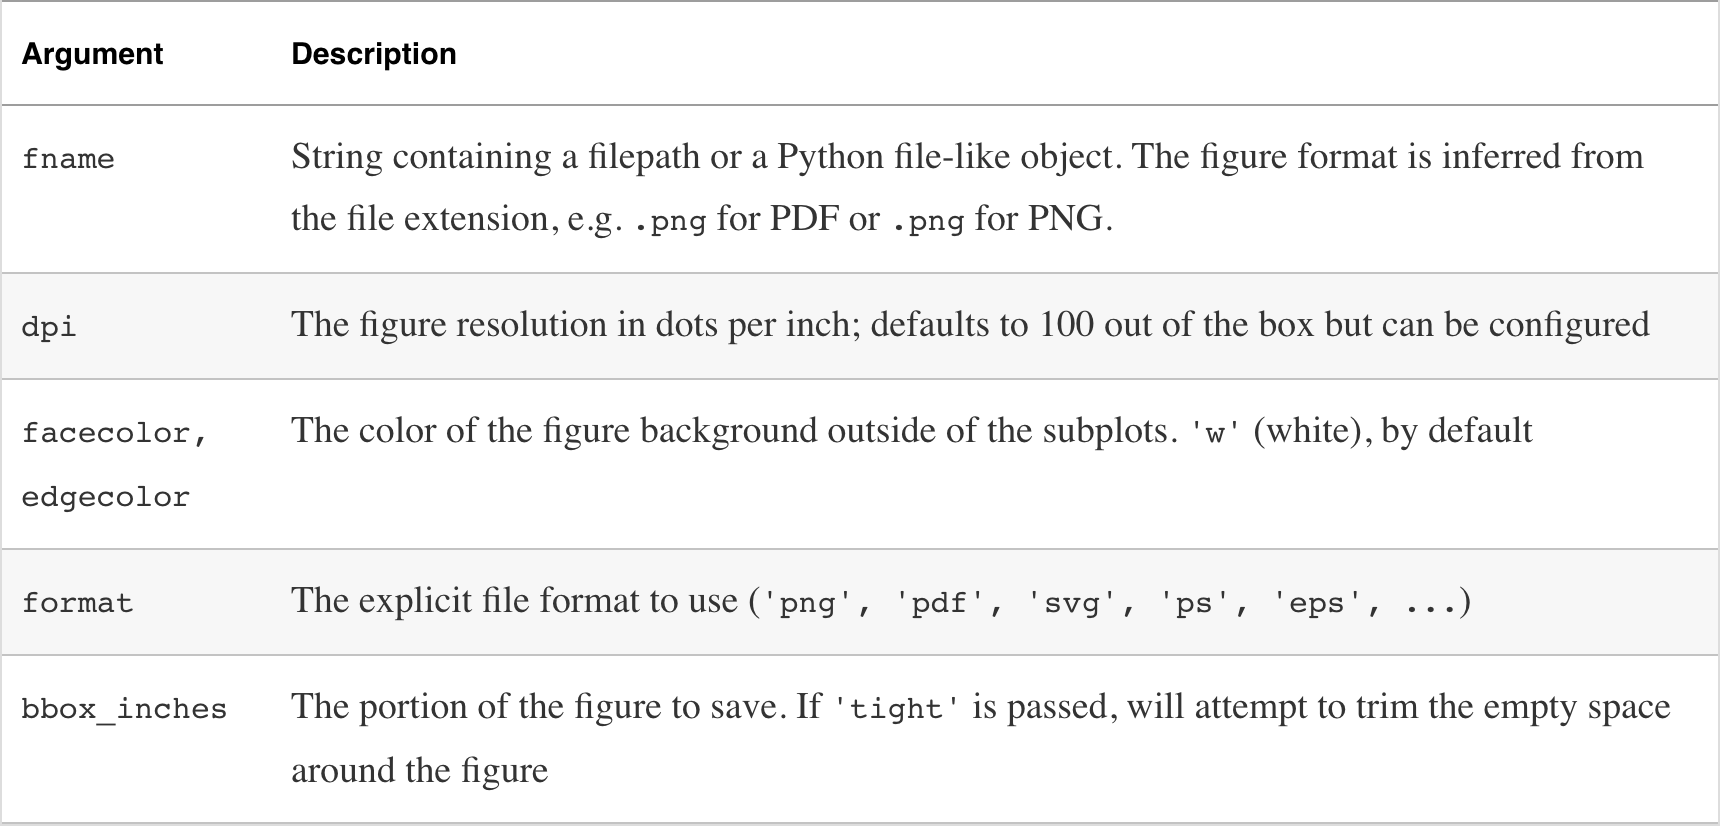

## <code>matplotlib</code> Configuration

-  <code>**matplotlib**</code> comes configured with **color schemes** and defaults options. 

-  Nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. 

-  <code>**matplotlib**</code> configuration system can be accessed either programmatically from Python using the <code>**rc**</code> method, or using an external configuration file (e.g., <code>**~/.matplotlibrc**</code>).

# Plotting with <code>pandas</code> and <code>seaborn</code>

-  <code>**matplotlib**</code> can be a fairly low level tool, which allows us to assemble a plot from its base components: the data, the type of plot (*line*, *bar*, *box*, *scatter*, *contour*, etc.), legend, title, tick labels, and other annotations. 
 
-  In <code>**pandas**</code> we may have multiple columns of data, along with row and column labels.

-  <code>**pandas**</code> has built-in methods which simplify creating visualizations from <code>**DataFrame**</code> and <code>**Series**</code> objects. 

-  On top of that, there is another useful statistical graphics library, called [<code>**seaborn**</code>](https://seaborn.pydata.org/)

## Line Plots

-  <code>**Series**</code> and <code>**DataFrame**</code> each have a <code>**plot**</code> attribute for making some basic plot types. 

-  By default, <code>**plot()**</code> makes **line plots**.

-  Most of <code>**pandas**</code>'s plotting methods accept an optional <code>**ax**</code> parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

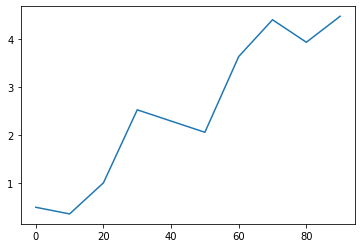

In [246]:
"""
Default line plots with pandas Series
"""
np.random.seed(42)
# Create a Series
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
_ = s.plot()

## Line Plots with <code>Series</code>

-  The <code>**Series**</code> object's index is passed to <code>**matplotlib**</code> for plotting on the $x$-axis (this can be disabled by passing <code>**use_index=False**</code>). 

-  The $x$-axis ticks and limits can be adjusted using the <code>**xticks**</code> and <code>**xlim**</code> options, and $y$-axis respectively using <code>**yticks**</code> and <code>**ylim**</code>.

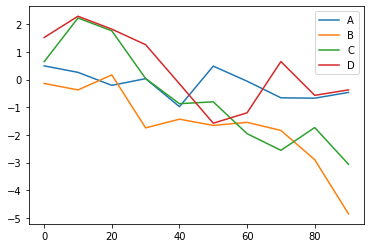

In [247]:
"""
Default line plots with pandas DataFrame
"""
np.random.seed(42)
# Create a DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
_ = df.plot()

## Line Plots with <code>DataFrame</code>

-  <code>**DataFrame**</code>'s <code>**plot**</code> method plots each of its columns as a different line on the same subplot, creating a legend automatically.

-  The <code>**plot**</code> attribute contains a "family" of methods for different plot types. 

-  For example, <code>**DataFrame.plot()**</code> is equivalent to <code>**DataFrame.plot.line()**</code>. 

## <code>pandas.plot</code> Arguments (1 of 2)

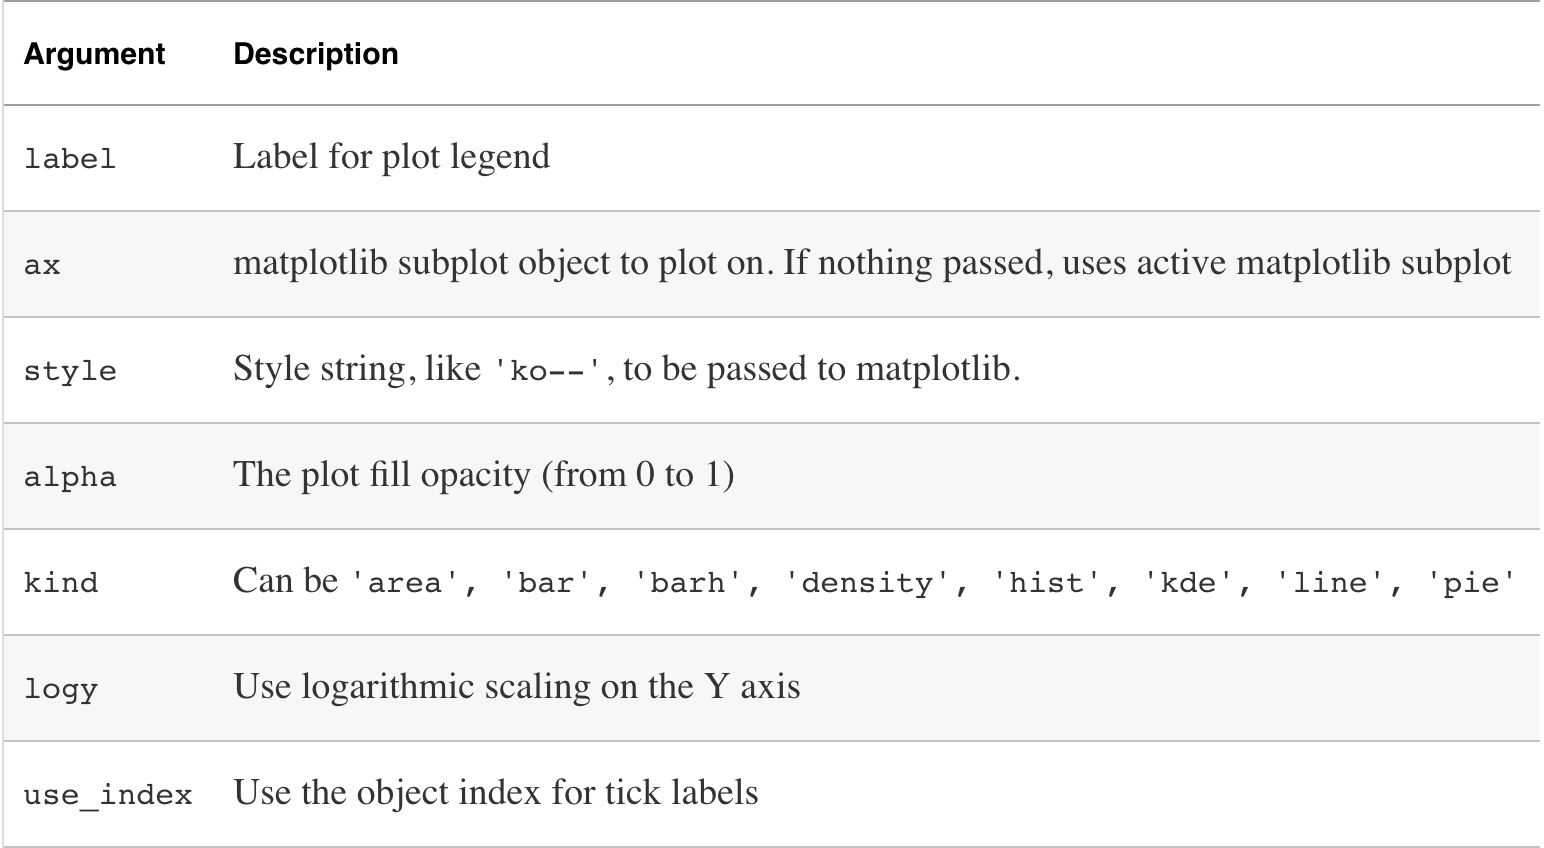

## <code>pandas.plot</code> Arguments (2 of 2)

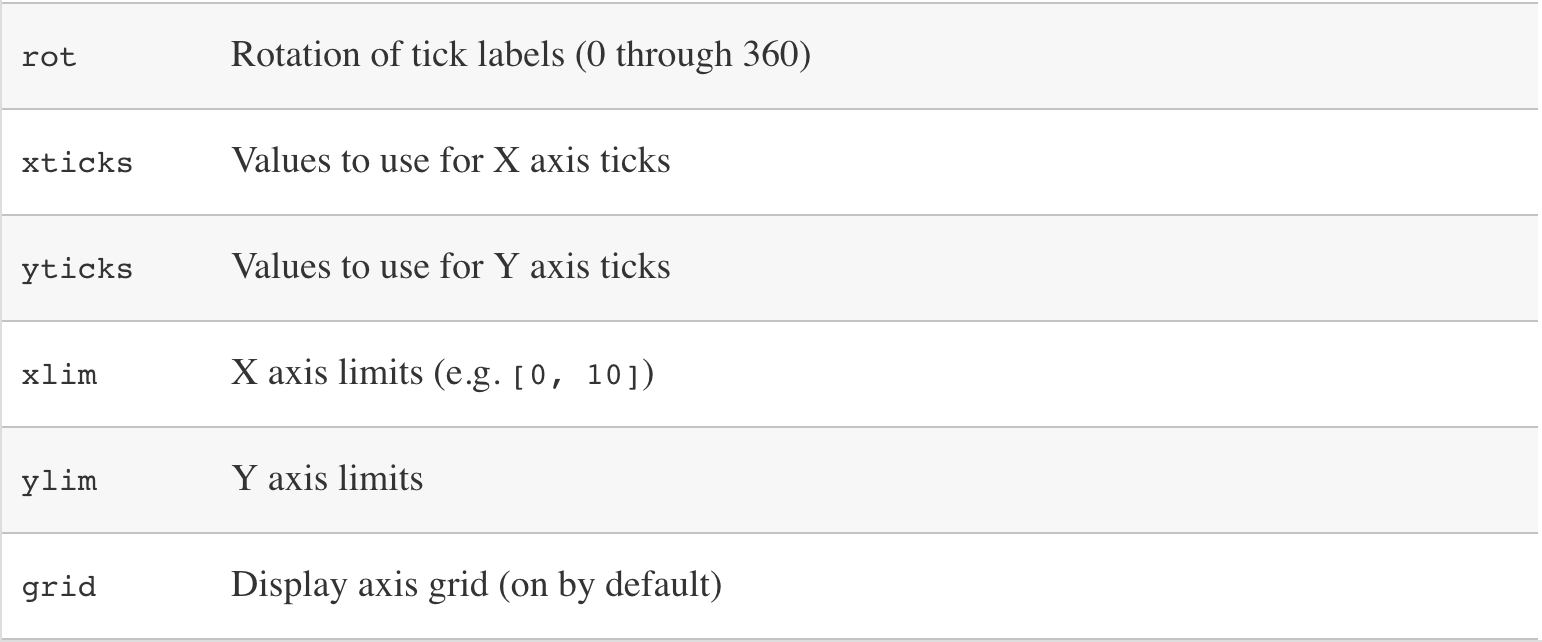

## <code>pandas.plot</code> Arguments (<code>DataFrame</code>-specific)

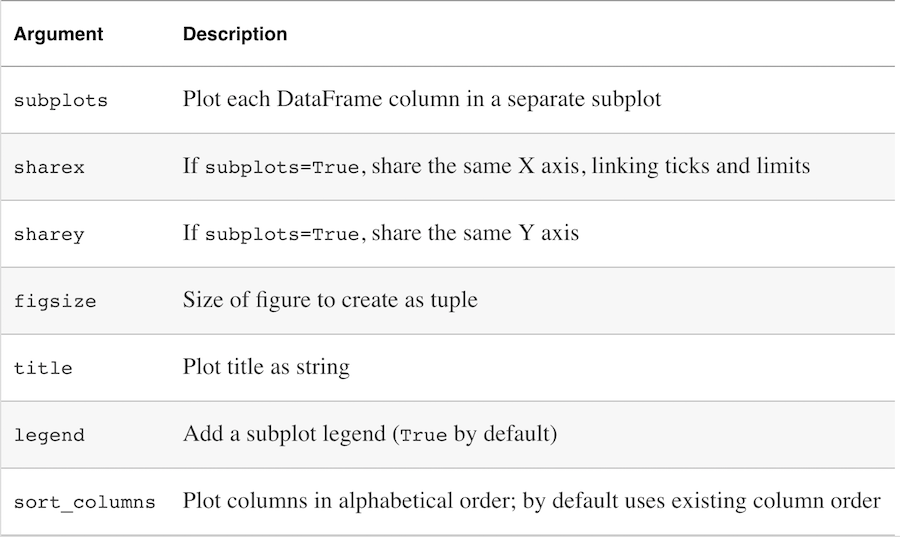

## Bar Plots

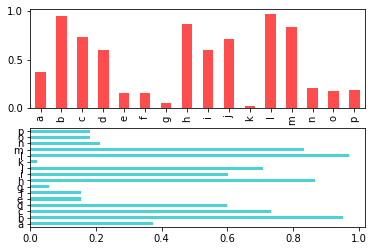

In [248]:
"""
The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. 
In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) tick.
"""
np.random.seed(42)
# Create a figure and subplot associated with it
fig, axes = plt.subplots(2, 1)
# Create a random series of values indexed by letter (i.e., chars)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# Specify the subplot where to place this bar plot
_ = data.plot.bar(ax=axes[0], color='r', alpha=0.7)
# Specify the subplot where to place this horizontal bar plot
_ = data.plot.barh(ax=axes[1], color='c', alpha=0.7)

In [249]:
"""
With a DataFrame, bar plots a group of bars for each row.
Fixed a row, each group of bars is made of the values contained in that row, side by side
(i.e., each bar group contains as many values as the number of columns).
"""
np.random.seed(42)

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

print(df)

Genus         A         B         C         D
one    0.374540  0.950714  0.731994  0.598658
two    0.156019  0.155995  0.058084  0.866176
three  0.601115  0.708073  0.020584  0.969910
four   0.832443  0.212339  0.181825  0.183405
five   0.304242  0.524756  0.431945  0.291229
six    0.611853  0.139494  0.292145  0.366362


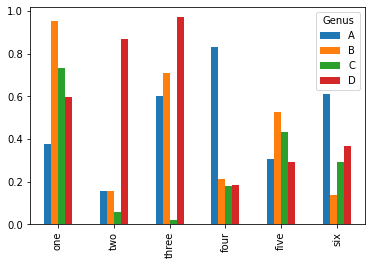

In [250]:
_ = df.plot.bar()
# Note that the name "Genus" on the DataFrame's columns is used to title the legend.

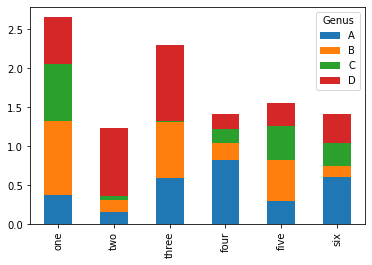

In [251]:
"""
Stacked bar plots are created from a DataFrame by passing stacked=True,
resulting in the value in each row being stacked together.
"""
_ = df.plot.bar(stacked=True)

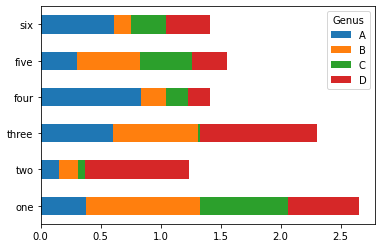

In [252]:
"""
Stacked bar plots are created from a DataFrame by passing stacked=True,
resulting in the value in each row being stacked together.
"""
# The same as above, yet horizontal
_ = df.plot.barh(stacked=True)

## Histograms and Density Plots

-  A **histogram** is a kind of bar plot that gives a discretized display of value frequency. 

-  The data points are split into discrete, evenly spaced **bins**, and the number of data points in each bin is plotted. 

-  It can be obtained by calling the <code>**plot.hist**</code> method on a <code>**Series**</code> object

## Histograms and Density Plots

-  A related plot type is a **density plot**, which is formed by computing an **_estimate_** of a **continuous probability distribution** that might have generated the observed data. 

-  A usual procedure is to approximate this distribution as a **mixture of "kernels"**, that is, simpler distributions like the Normal distribution. 

-  Thus, density plots are also known as **KDE** (kernel density estimate) plots. 

-  Using <code>**plot.kde**</code> makes a density plot using the conventional mixture-of-normals estimate

In [254]:
"""
Let's go back to our running example DataFrame of users.
"""
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
# The first line of the file represents the header, and each field
# is separated by a pipe
"""
We specify the url where the data is located, the character used to separate fields ('|')
and the name of the column to use as row label (otherwise, RangeInteger will be used)
"""
users = pd.read_csv(url, sep='|', index_col='user_id')
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [255]:
# 1. For each user, extract an average salary value drawn from a Normal distribution.
# In other words, we need to drawn a sample from a Normal distribution, 
# whose size is equal to that of the users in our dataset.
# To do so, we need to specify the two parameters of the distribution: 
# mean (mu) and standard deviation (sigma)
np.random.seed(42)
mu = 35000
sigma = 10000
normal_salaries = np.random.normal(loc=mu, scale=sigma, size=users.shape[0])
# Let's also round salaries to the 2nd decimal digit
normal_salaries = np.round(normal_salaries, decimals=2)
# Alternatively:
# np.round(normal_salaries, decimals=2, out=normal_salaries)
print(normal_salaries[:20])

[39967.14 33617.36 41476.89 50230.3  32658.47 32658.63 50792.13 42674.35
 30305.26 40425.6  30365.82 30342.7  37419.62 15867.2  17750.82 29377.12
 24871.69 38142.47 25919.76 20876.96]


In [256]:
# 2. Let's add an extra 'salary' column to our 'users' DataFrame
# using the just created numpy array
users['salary'] = normal_salaries
print(users.head())

         age gender  occupation zip_code    salary
user_id                                           
1         24      M  technician    85711  39967.14
2         53      F       other    94043  33617.36
3         23      M      writer    32067  41476.89
4         24      M  technician    43537  50230.30
5         33      F       other    15213  32658.47


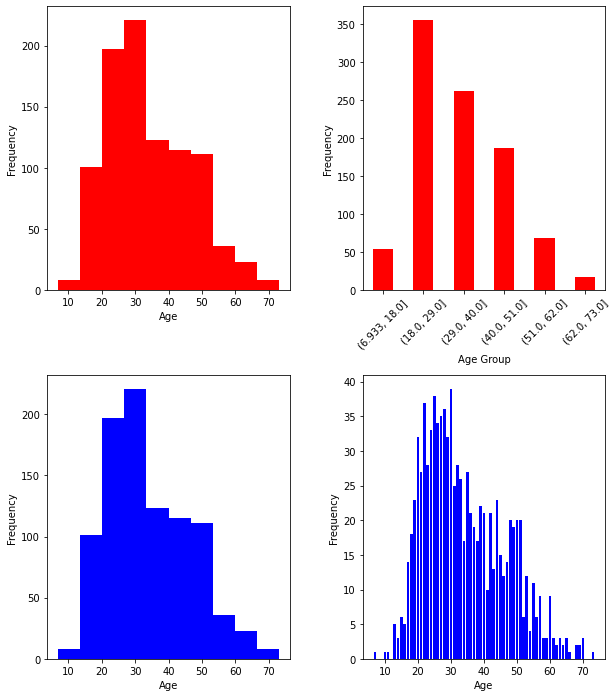

In [257]:
"""
Let's first plot the histogram corresponding to the distribution
of 'age' values from our users DataFrame
"""
fig, axes = plt.subplots(2, 2, figsize=(10,12))
# Using pandas' instance object method 'plot.hist()'
_ = users['age'].plot.hist(ax=axes[0,0], color='r')
_ = axes[0,0].set_xlabel('Age'); _ = axes[0,0].set_ylabel('Frequency')
# Achieving a similar behavior using value_counts() and bar plot
_ = users['age'].value_counts(bins=6).sort_index().plot.bar(ax=axes[0,1], color='r', rot=45)
_ = axes[0,1].set_xlabel('Age Group'); _ = axes[0,1].set_ylabel('Frequency')
# Using matplotlib API
_ = axes[1,0].hist(users['age'], color='b')
_ = axes[1,0].set_xlabel('Age'); _ = axes[1,0].set_ylabel('Frequency')

_ = axes[1,1].bar(users['age'].value_counts().sort_index().index, 
                  users['age'].value_counts().sort_index().values, color='b')
_ = axes[1,1].set_xlabel('Age'); _ = axes[1,1].set_ylabel('Frequency')
plt.subplots_adjust(wspace=.3, hspace=.3)

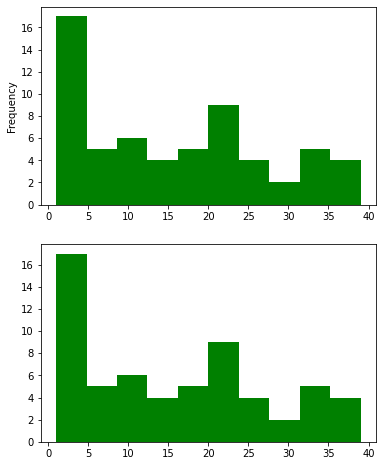

In [258]:
# NOTE: If we call .hist() on value_counts() we obtain the histogram of the histogram!
# In other words, we obtain the frequency distribution of frequency values
fig, axes = plt.subplots(2, 1, figsize=(6,8))
_ = users['age'].value_counts().sort_index().plot.hist(ax=axes[0], color='g')
_ = axes[1].hist(users['age'].value_counts().sort_index(), color='g')

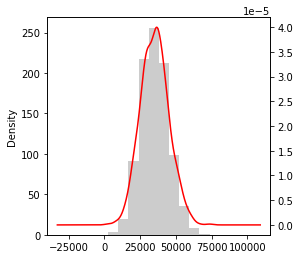

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# Plot on the same AxesSubplot both histogram and density estimate
_ = users.salary.plot.hist(color='k', alpha=.2)
_ = users.salary.plot.density(ax=ax, color='r', secondary_y=True)

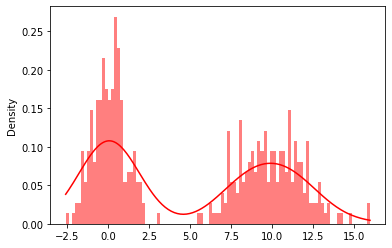

In [263]:
"""
Seaborn makes histograms and density plots even easier through its 'histplot' method, 
which can plot both a histogram and a continuous density estimate simultaneously.
"""
comp1 = np.random.normal(0, 1, size=200)  # Normal(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # Normal(10, 4)
# Create a Pandas Series from the two normally-distributed samples above
values = pd.Series(np.concatenate([comp1, comp2]))
_ = sns.histplot(values,bins=100, color="red", kde=True, stat="density", linewidth=0)



## Visualize Pairwise Relationships

-  Point plots (also sometimes called **scatter plots**) can be a useful way of examining the relationship between two one-dimensional series. 

- It may be useful to look at _all_ the scatter plots among a group of variables; this is known as a **pairs plot** or **scatter plot matrix**. 

-  <code>**seaborn**</code> has a convenient <code>**pairplot**</code> function; it supports placing histograms or density estimates of each variable along the diagonal.

In [264]:
"""
Let's load the iris dataset which comes along with seaborn and
use it to demonstrate how 'pairplot' works.
"""
# Loading iris dataset
iris = sns.load_dataset("iris")

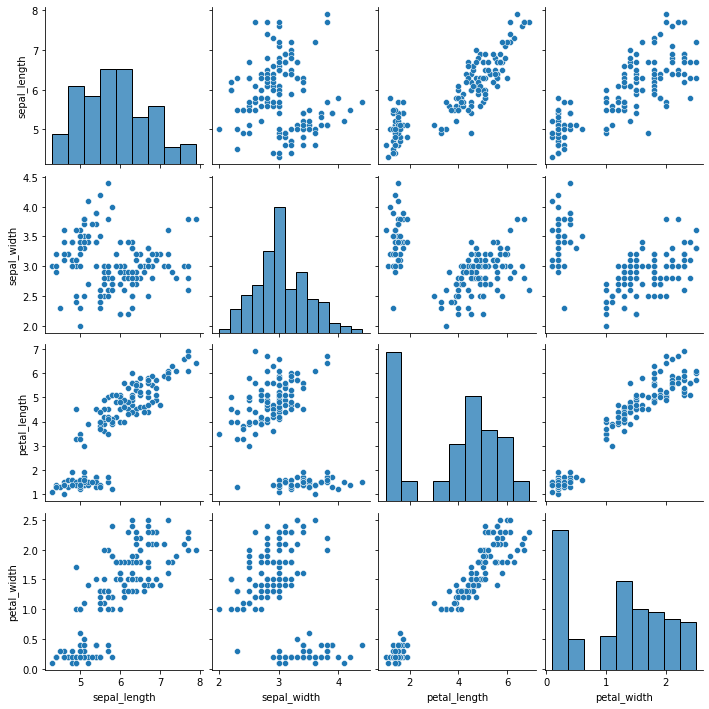

In [265]:
_ = sns.pairplot(iris)

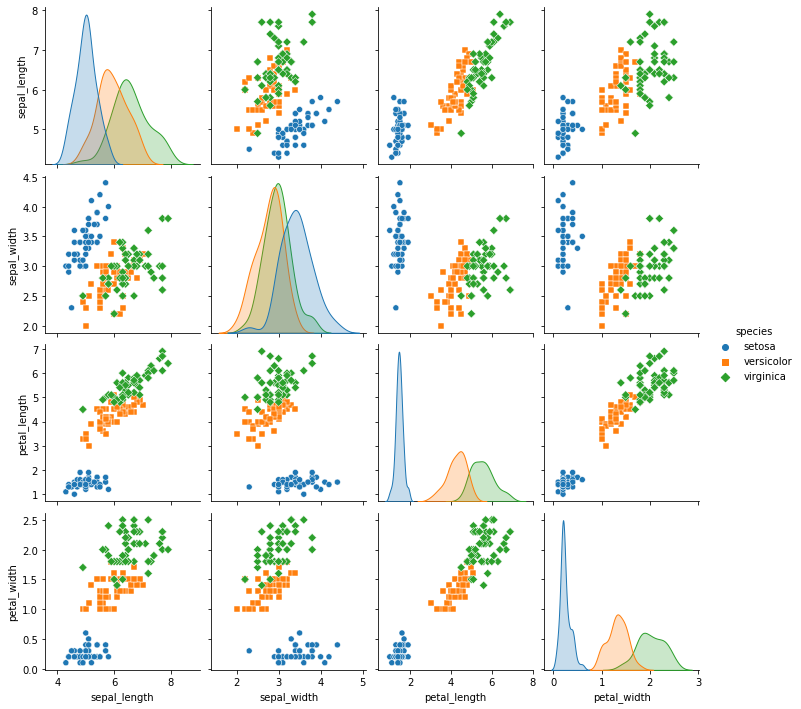

In [266]:
_ = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

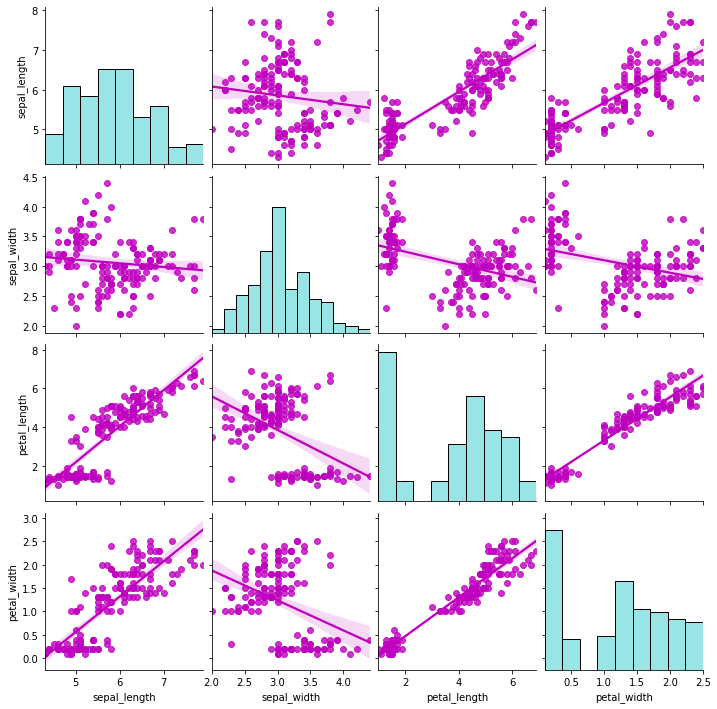

In [267]:
_ = sns.pairplot(iris, kind="reg",
                 diag_kind='hist',
                 diag_kws={'color': 'c', 'alpha': 0.4}, 
                 plot_kws={'color': 'm'})

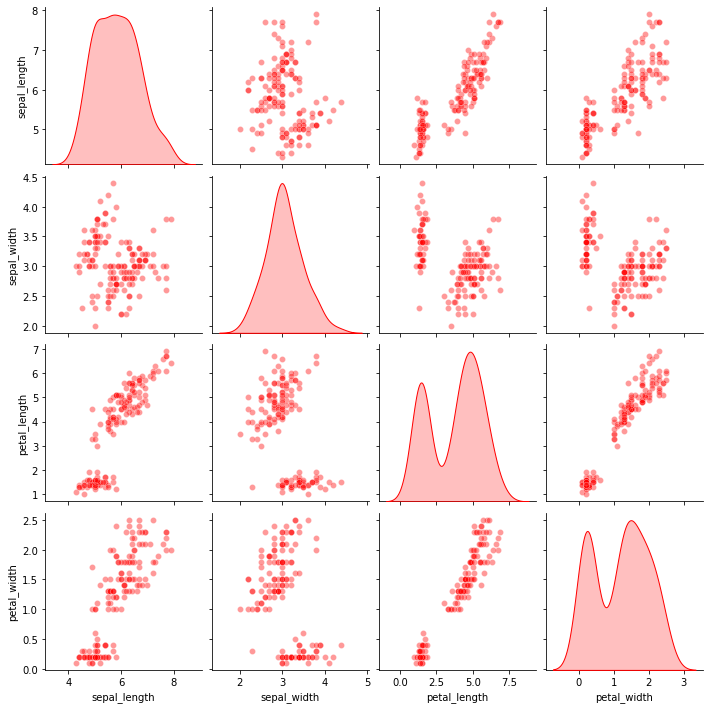

In [268]:
_ = sns.pairplot(iris, diag_kind='kde', 
                 diag_kws={'shade': True, 'color': 'r'}, 
                 plot_kws={'alpha': 0.4, 'color': 'r'})